# Libraries

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import random
import json

# Time-Series Data Selection

In [1]:
def count_files_and_organize_by_subfolder(folder_path):
    subfolder_files = {}

    for subdir, _, files in os.walk(folder_path):
        subfolder_name = os.path.basename(subdir)
        if subfolder_name not in subfolder_files:
            subfolder_files[subfolder_name] = []

        subfolder_files[subfolder_name].extend(files)

    return subfolder_files

def print_subfolder_files_info(subfolder_files):
    for subfolder, files in subfolder_files.items():
        print(f"Subfolder: {subfolder}")
        #for file in files:
            #print(f"  File: {file}")
        print(f"Number of files in '{subfolder}': {len(files)}\n")

In [3]:
tsb_uad_pub_folder_path = '../TSB-UAD-Public/TSB-UAD-Public'
subfolder_files = count_files_and_organize_by_subfolder(tsb_uad_pub_folder_path)
del subfolder_files['TSB-UAD-Public']
print_subfolder_files_info(subfolder_files)

Subfolder: NASA-MSL
Number of files in 'NASA-MSL': 54

Subfolder: KDD21
Number of files in 'KDD21': 250

Subfolder: MITDB
Number of files in 'MITDB': 32

Subfolder: SVDB
Number of files in 'SVDB': 115

Subfolder: NASA-SMAP
Number of files in 'NASA-SMAP': 108

Subfolder: MGAB
Number of files in 'MGAB': 10

Subfolder: Genesis
Number of files in 'Genesis': 6

Subfolder: YAHOO
Number of files in 'YAHOO': 367

Subfolder: OPPORTUNITY
Number of files in 'OPPORTUNITY': 465

Subfolder: GHL
Number of files in 'GHL': 126

Subfolder: ECG
Number of files in 'ECG': 53

Subfolder: SMD
Number of files in 'SMD': 281

Subfolder: IOPS
Number of files in 'IOPS': 58

Subfolder: Occupancy
Number of files in 'Occupancy': 10

Subfolder: NAB
Number of files in 'NAB': 58

Subfolder: Dodgers
Number of files in 'Dodgers': 1

Subfolder: Daphnet
Number of files in 'Daphnet': 45

Subfolder: SensorScope
Number of files in 'SensorScope': 23



In [6]:
sorted_subfolders = sorted(subfolder_files.items(), key=lambda item: len(item[1]), reverse=False)

for subfolder, files in sorted_subfolders:
    print(f"Subfolder: {subfolder}")
    #for file in files:
        #print(f"  File: {file}")
    print(f"Number of files in '{subfolder}': {len(files)}\n")

Subfolder: Dodgers
Number of files in 'Dodgers': 1

Subfolder: Genesis
Number of files in 'Genesis': 6

Subfolder: MGAB
Number of files in 'MGAB': 10

Subfolder: Occupancy
Number of files in 'Occupancy': 10

Subfolder: SensorScope
Number of files in 'SensorScope': 23

Subfolder: MITDB
Number of files in 'MITDB': 32

Subfolder: Daphnet
Number of files in 'Daphnet': 45

Subfolder: ECG
Number of files in 'ECG': 53

Subfolder: NASA-MSL
Number of files in 'NASA-MSL': 54

Subfolder: IOPS
Number of files in 'IOPS': 58

Subfolder: NAB
Number of files in 'NAB': 58

Subfolder: NASA-SMAP
Number of files in 'NASA-SMAP': 108

Subfolder: SVDB
Number of files in 'SVDB': 115

Subfolder: GHL
Number of files in 'GHL': 126

Subfolder: KDD21
Number of files in 'KDD21': 250

Subfolder: SMD
Number of files in 'SMD': 281

Subfolder: YAHOO
Number of files in 'YAHOO': 367

Subfolder: OPPORTUNITY
Number of files in 'OPPORTUNITY': 465



## Plot all Time-Series (TS) from n subfolders

Plotting for subfolder: Dodgers
Filename: 101-freeway-traffic.test.out


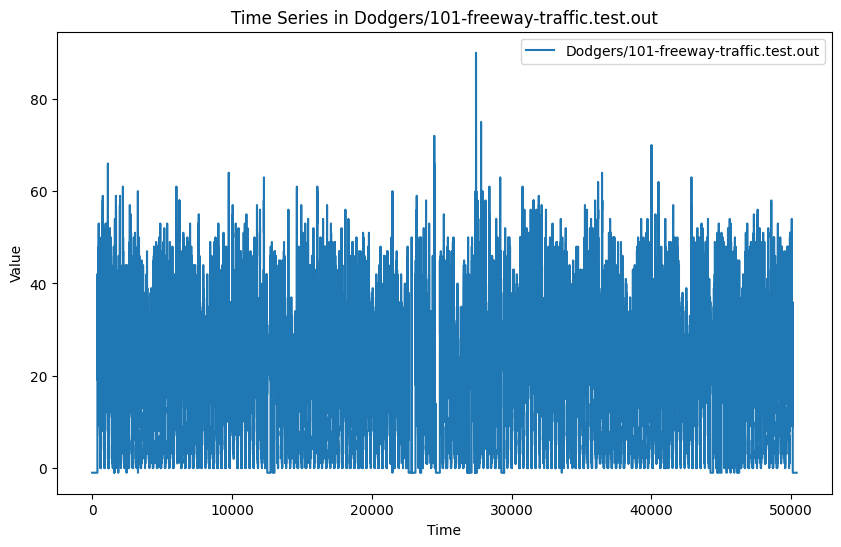

Plotting for subfolder: Genesis
Filename: genesis-anomalies.test.csv@17.out


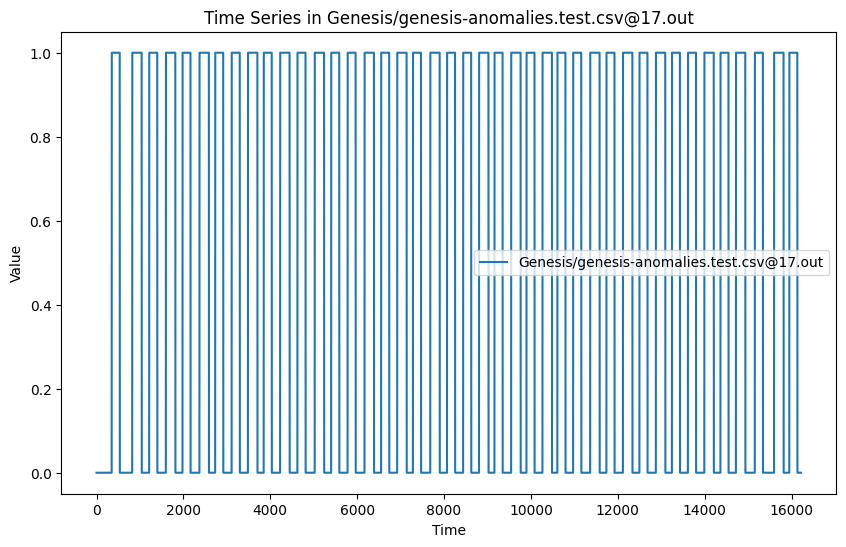

Filename: genesis-anomalies.test.csv@13.out


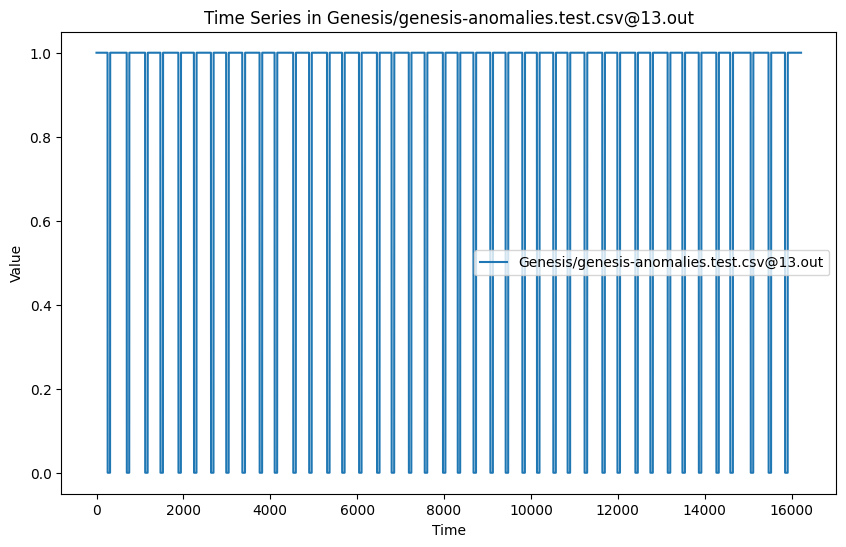

Filename: genesis-anomalies.test.csv@6.out


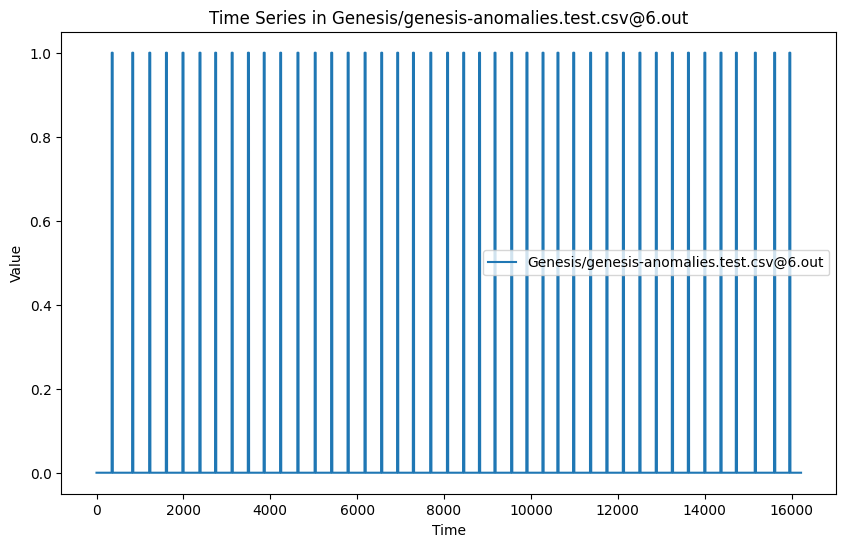

Filename: genesis-anomalies.test.csv@3.out


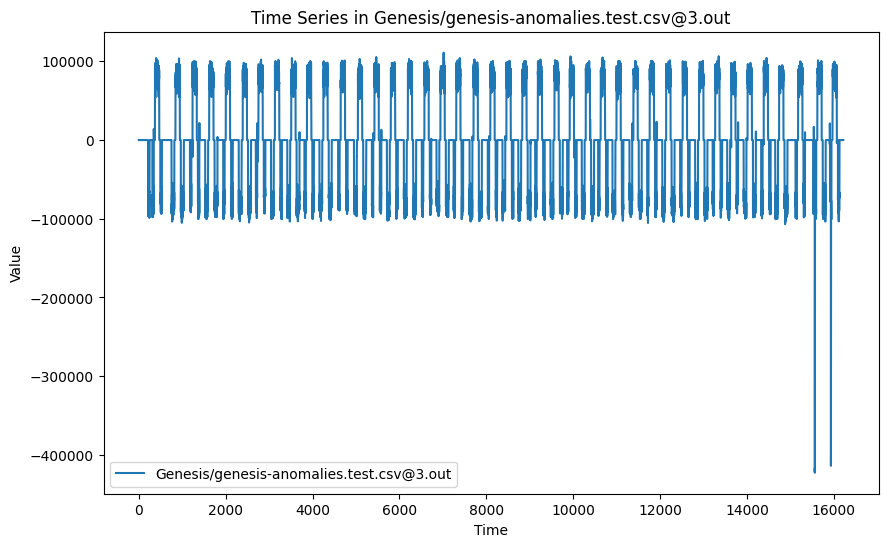

Filename: genesis-anomalies.test.csv@5.out


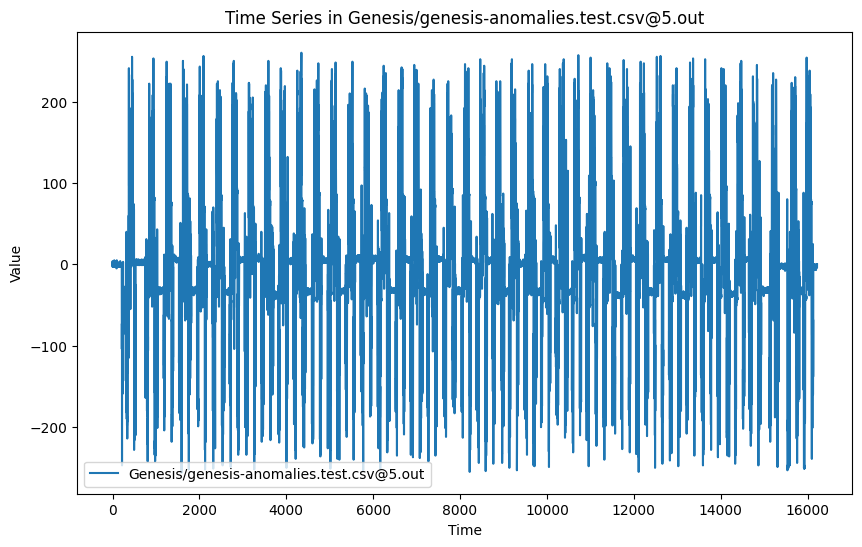

Filename: genesis-anomalies.test.csv@1.out


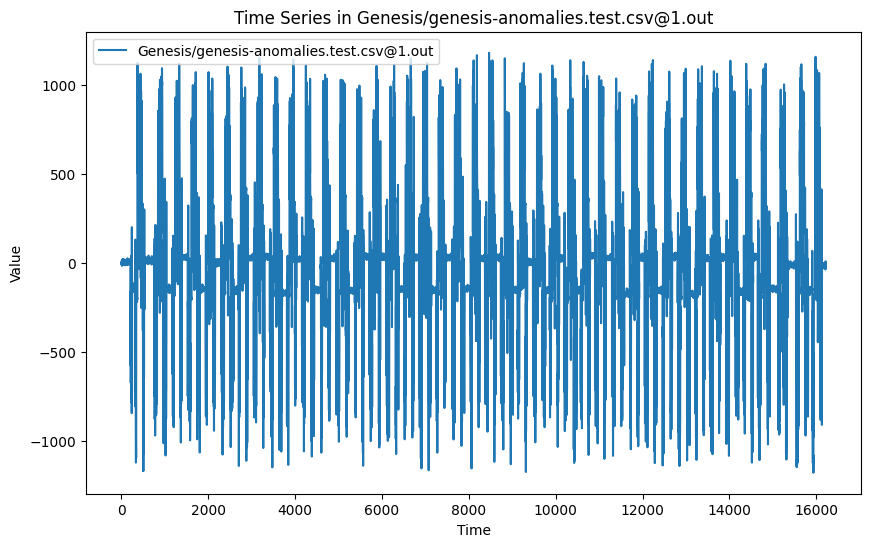

Plotting for subfolder: MGAB
Filename: 1.test.out


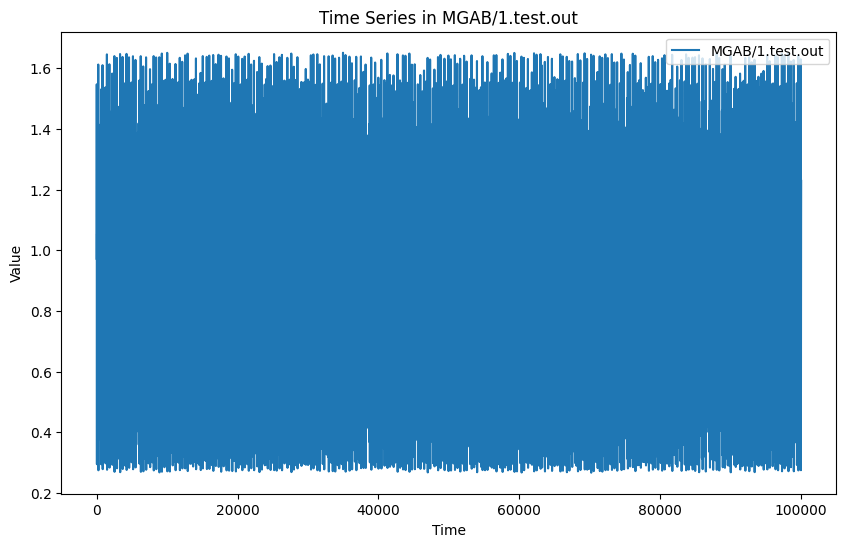

Filename: 4.test.out


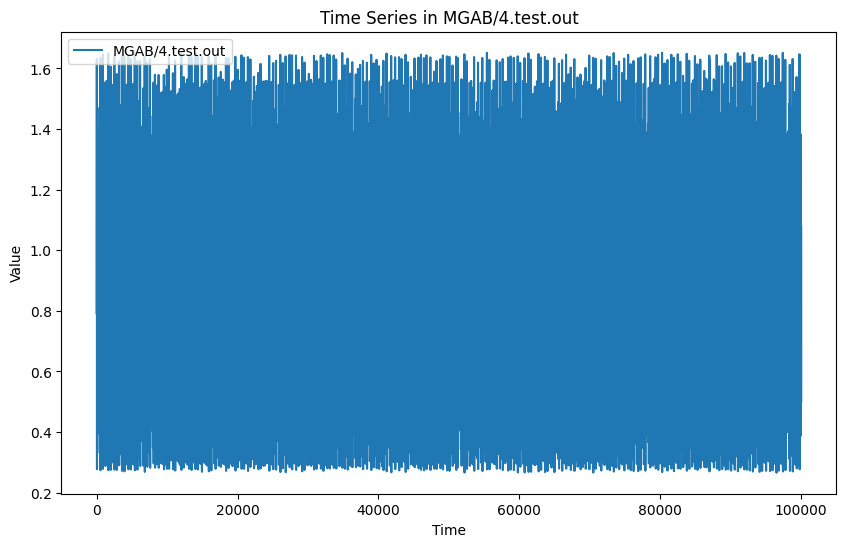

Filename: 8.test.out


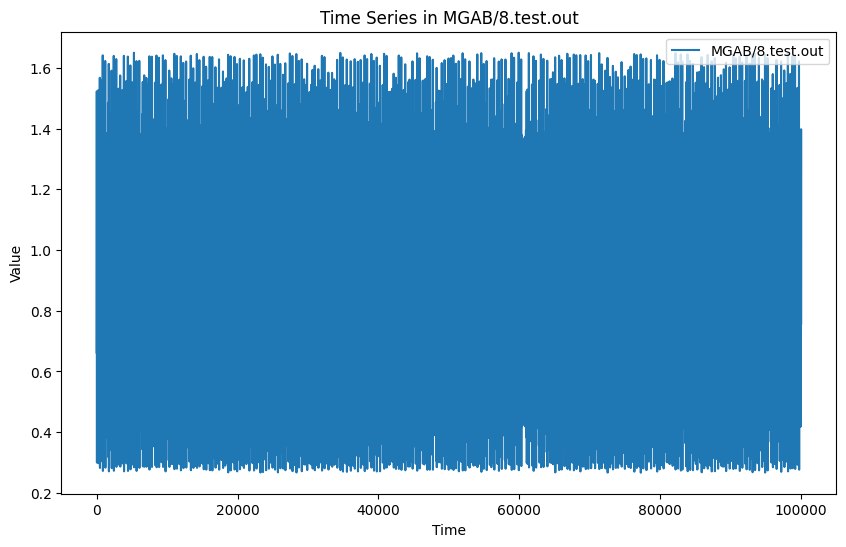

Filename: 10.test.out


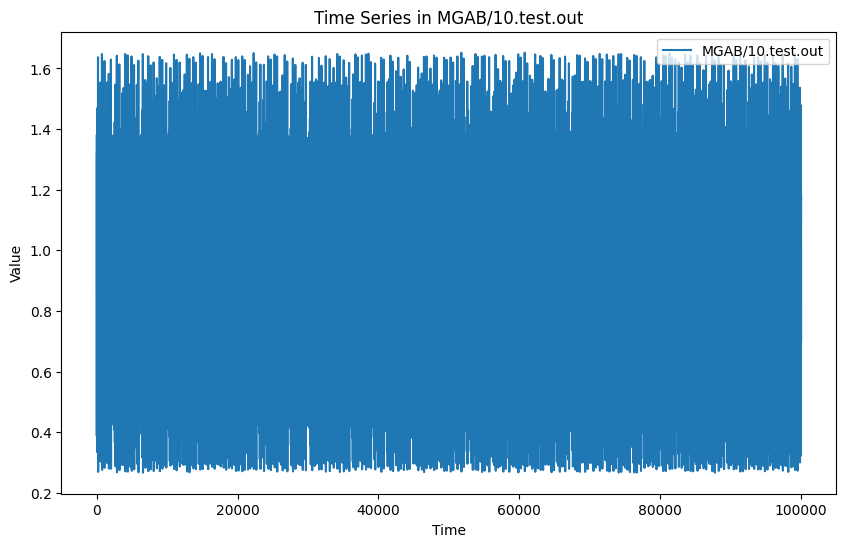

Filename: 9.test.out


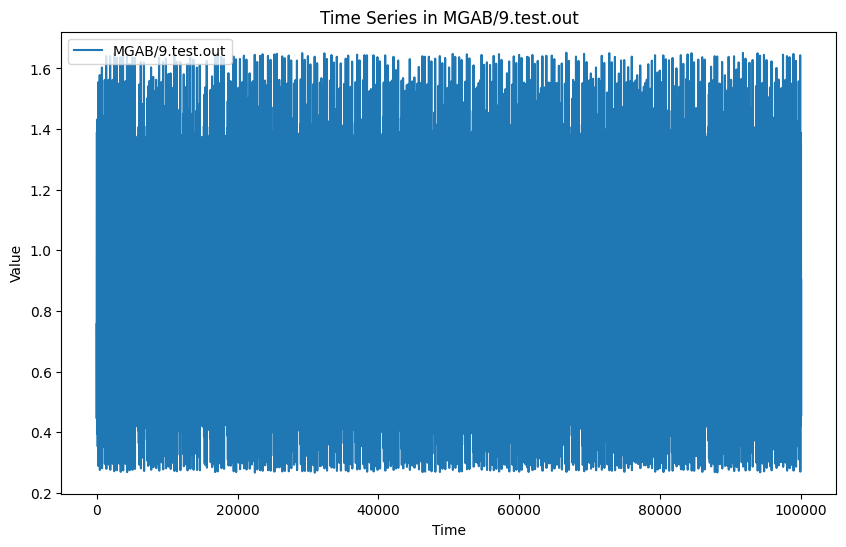

Filename: 5.test.out


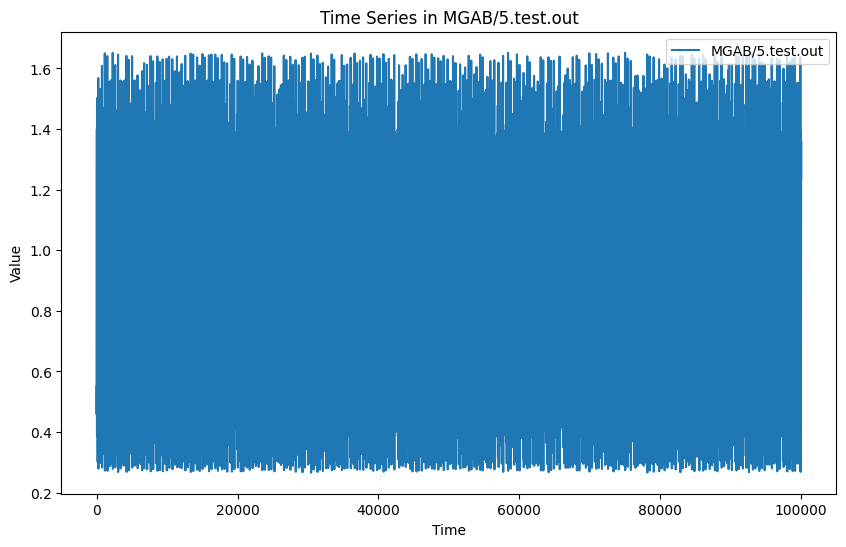

Filename: 3.test.out


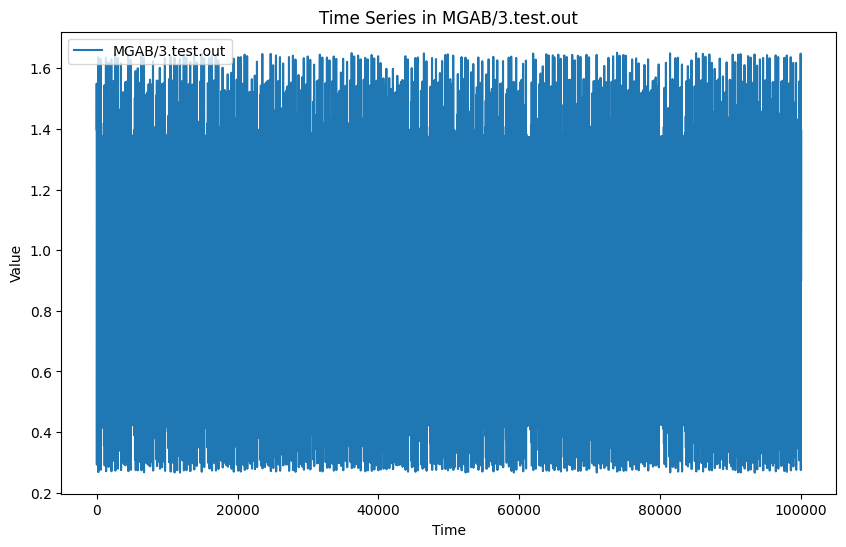

Filename: 6.test.out


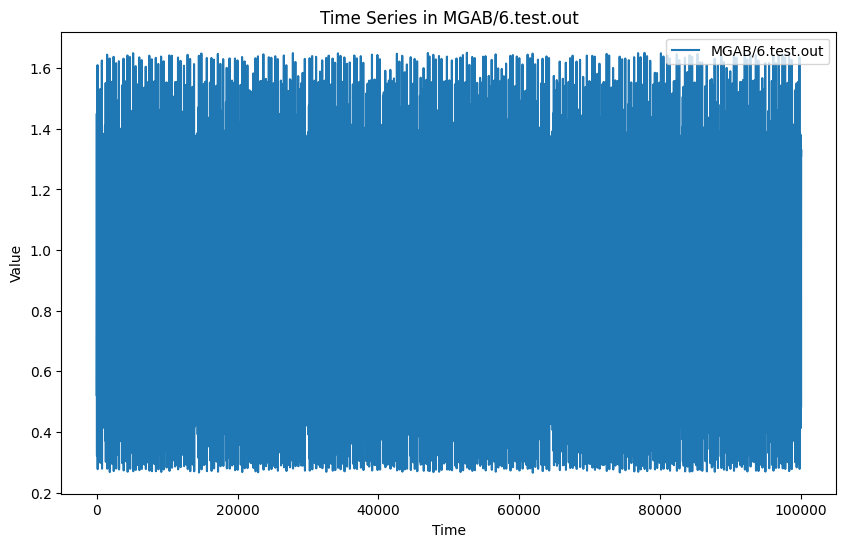

Filename: 7.test.out


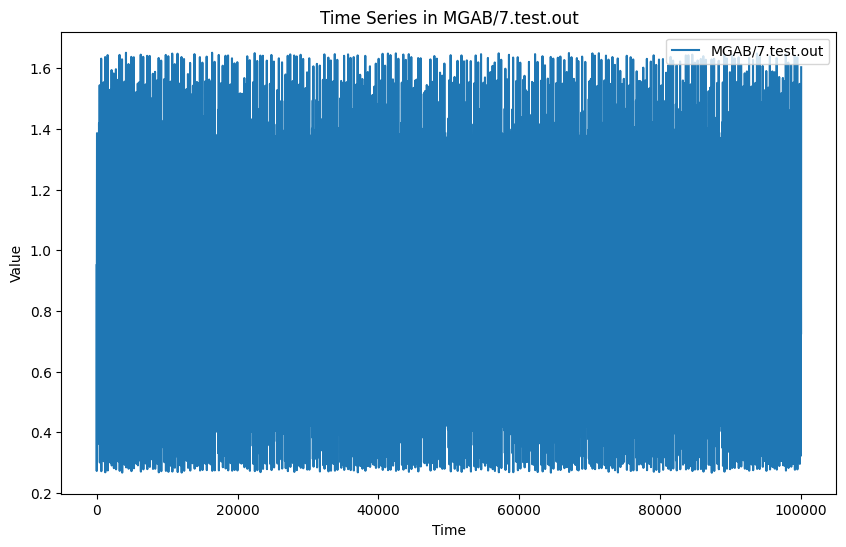

Filename: 2.test.out


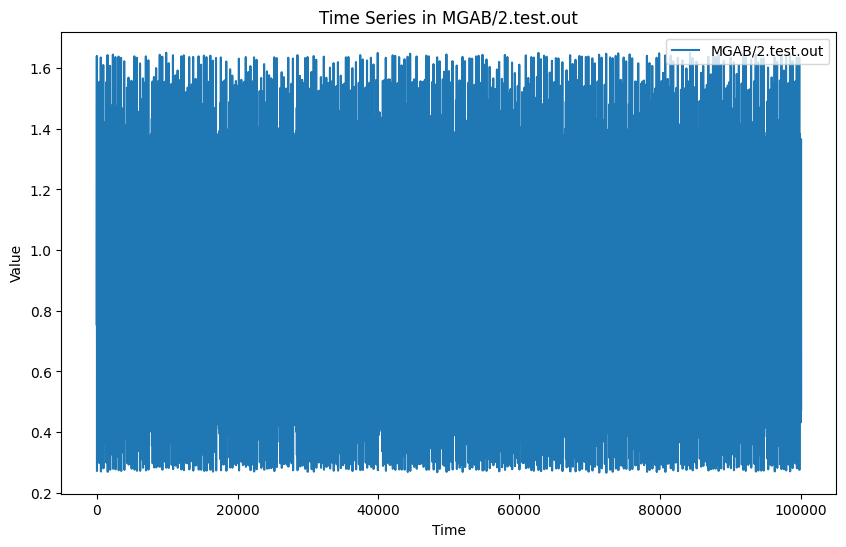

Plotting for subfolder: Occupancy
Filename: room-occupancy-0.test.csv@4.out


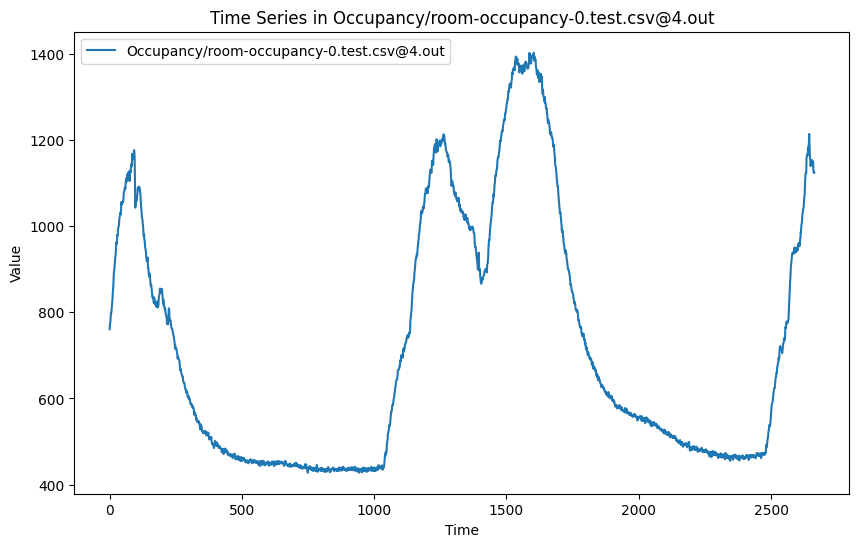

Filename: room-occupancy.train.csv@3.out


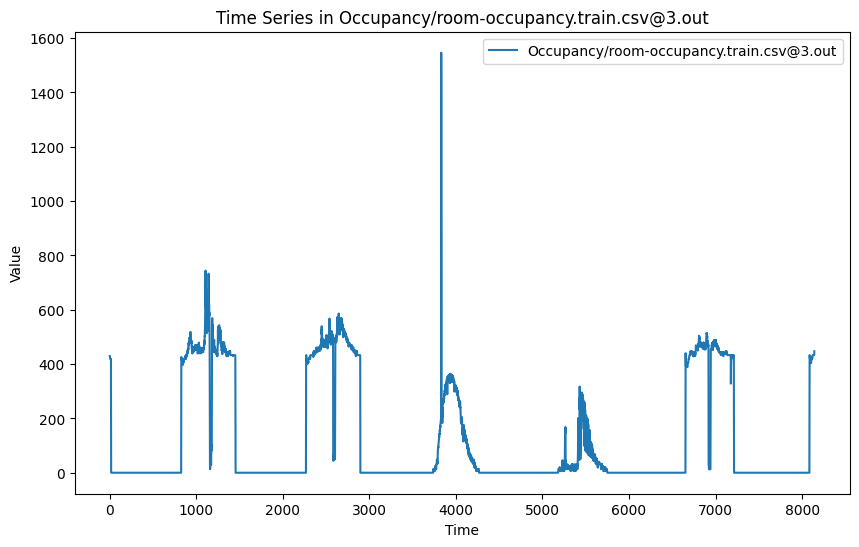

Filename: room-occupancy-0.test.csv@3.out


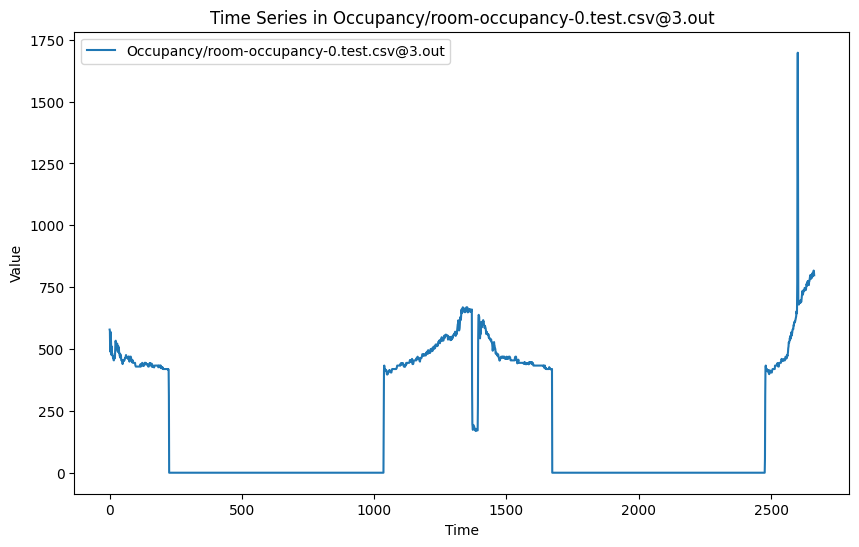

Filename: room-occupancy-1.test.csv@4.out


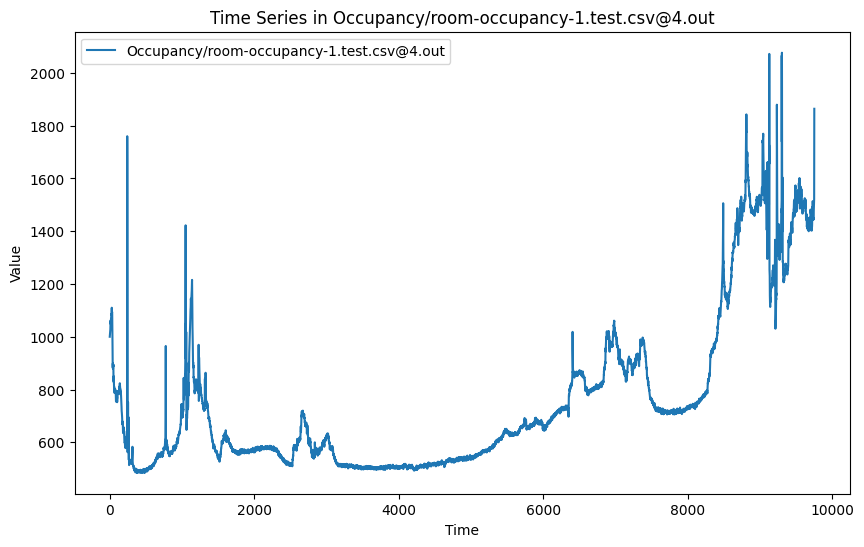

Filename: room-occupancy-0.test.csv@2.out


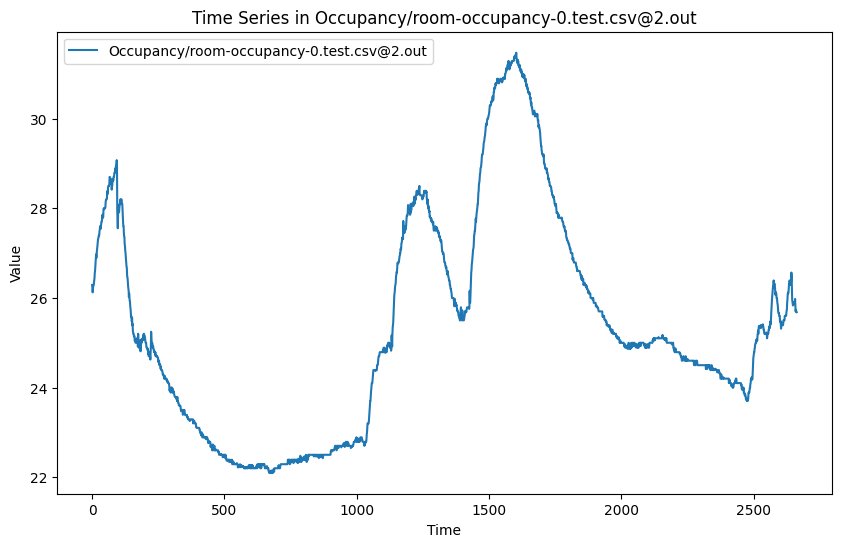

Filename: room-occupancy-1.test.csv@3.out


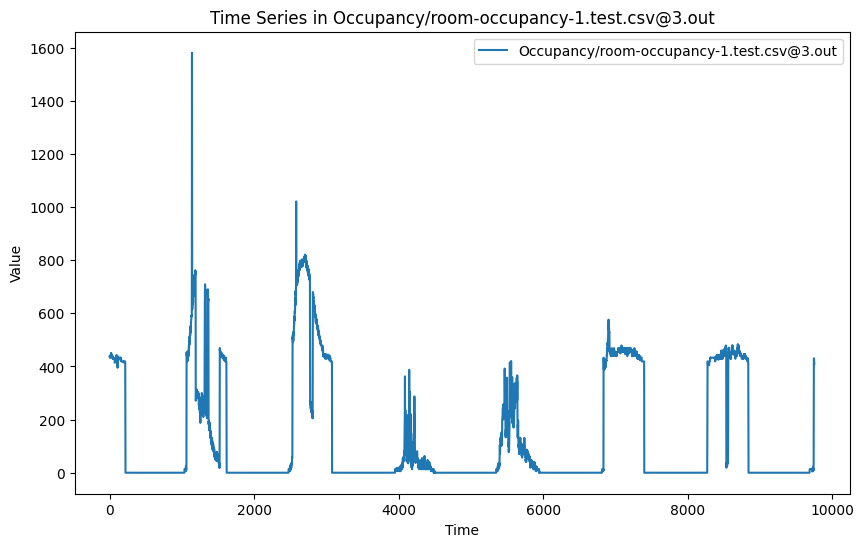

Filename: room-occupancy-0.test.csv@5.out


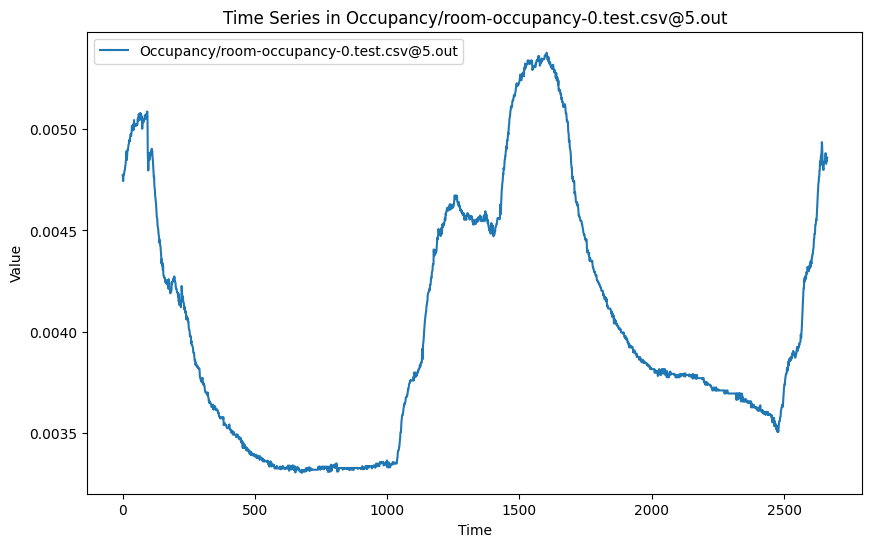

Filename: room-occupancy-0.test.csv@1.out


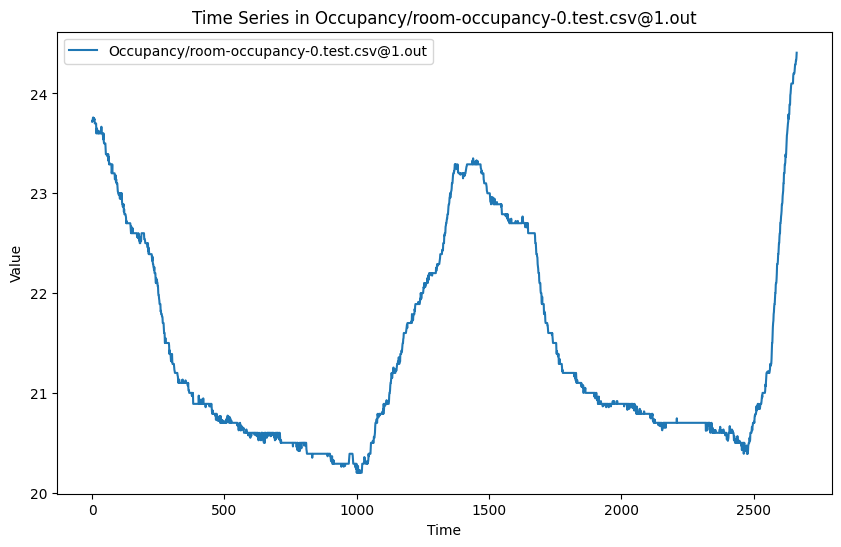

Filename: room-occupancy.train.csv@5.out


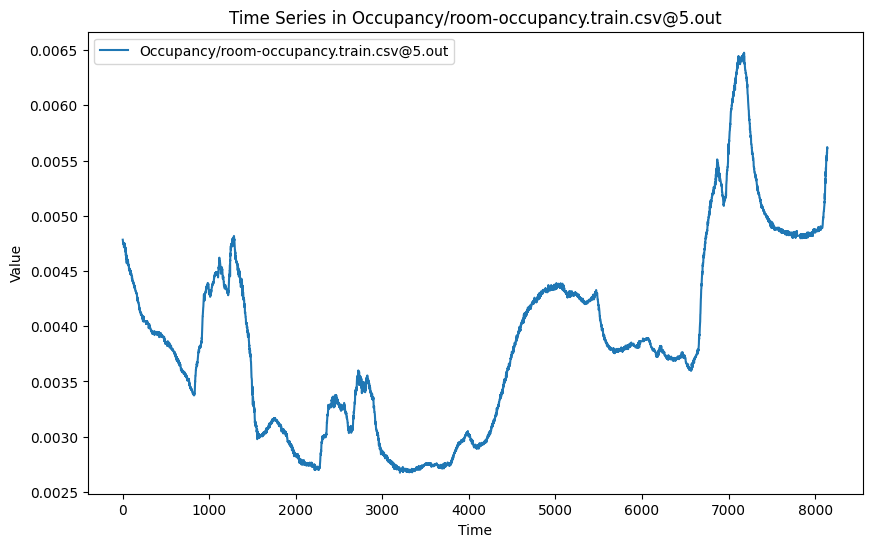

Filename: room-occupancy.train.csv@4.out


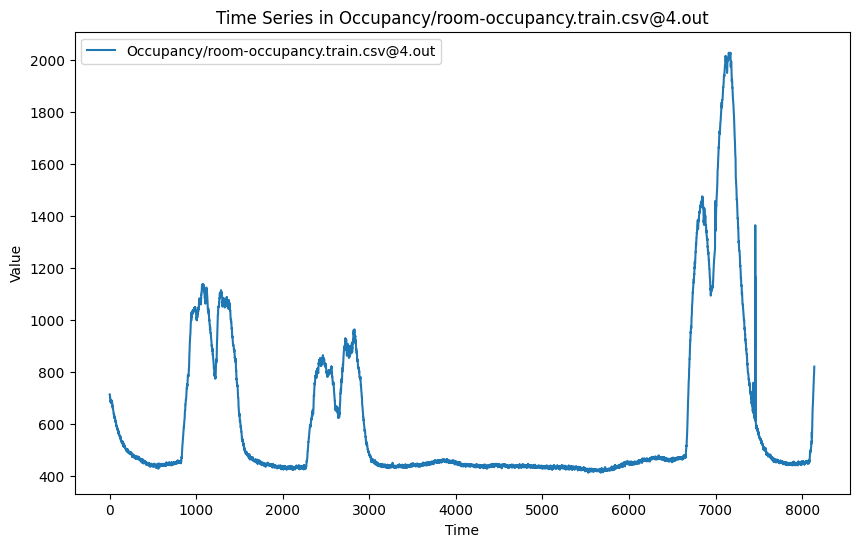

Plotting for subfolder: SensorScope
Filename: stb-10.test.out


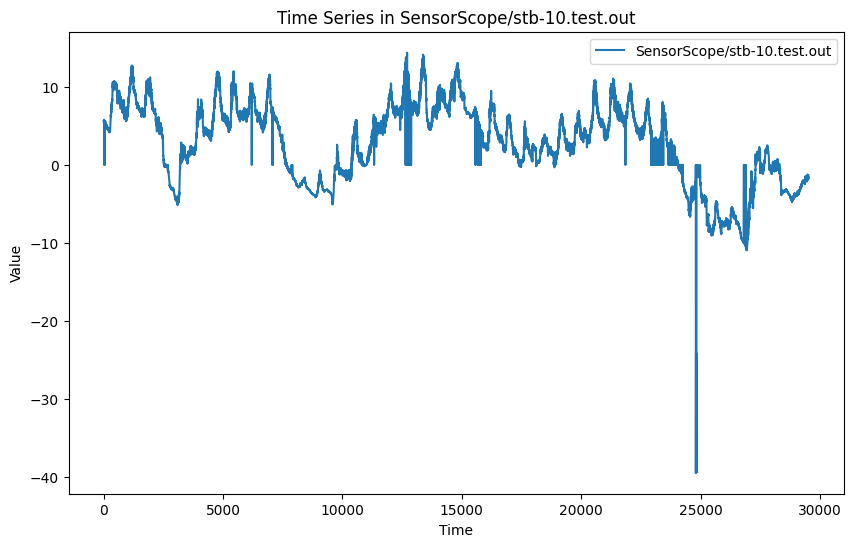

Filename: stb-32.test.out


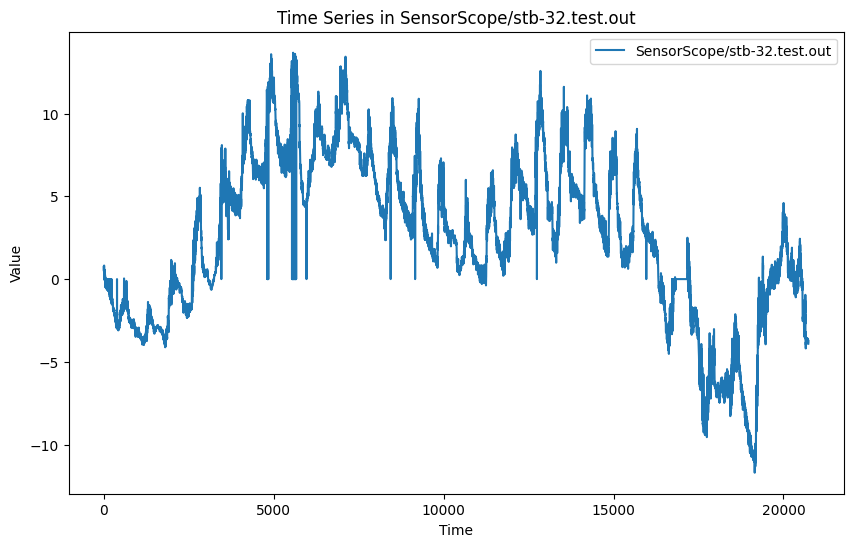

Filename: stb-28.test.out


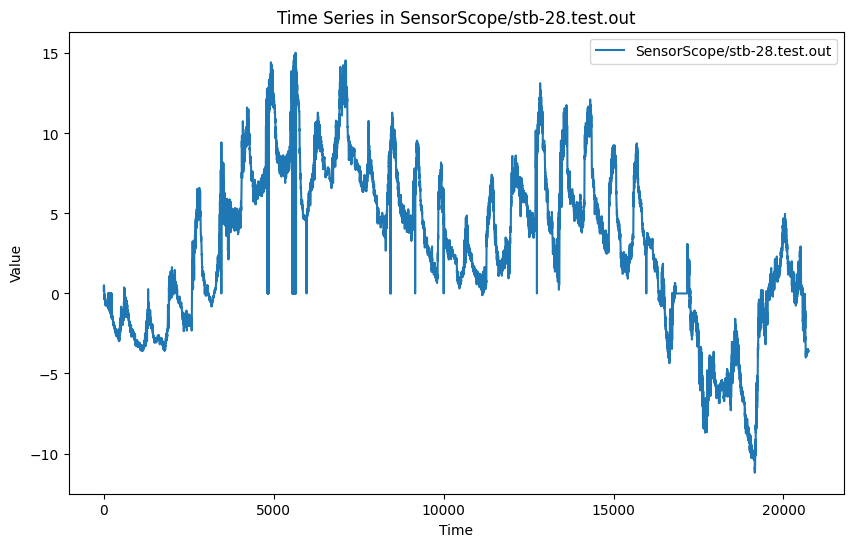

Filename: stb-14.test.out


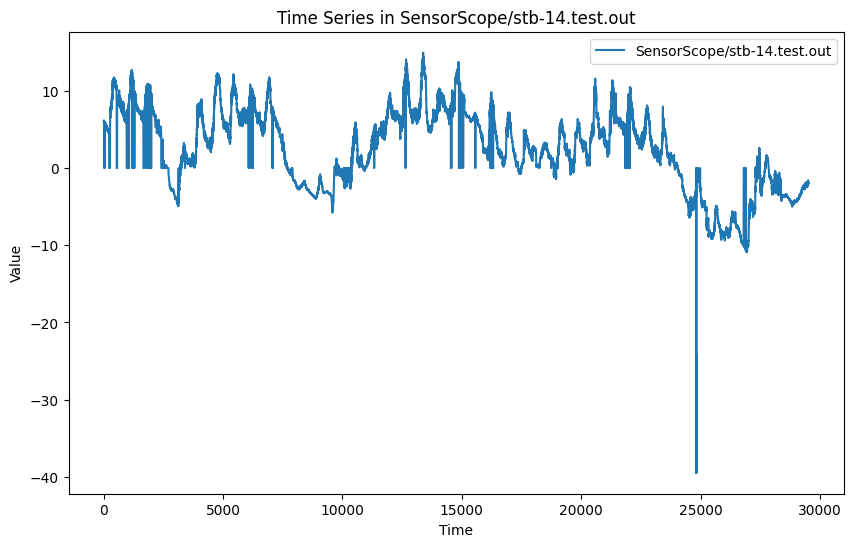

Filename: stb-5.test.out


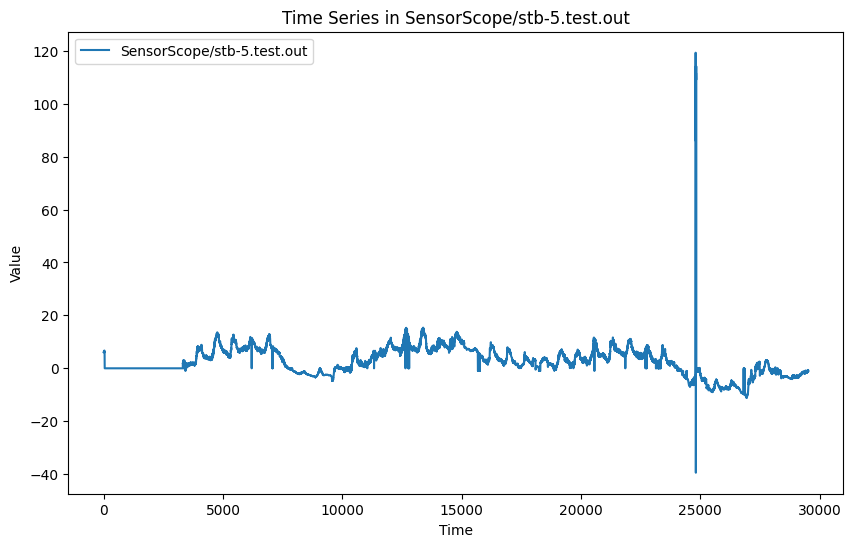

Filename: stb-4.test.out


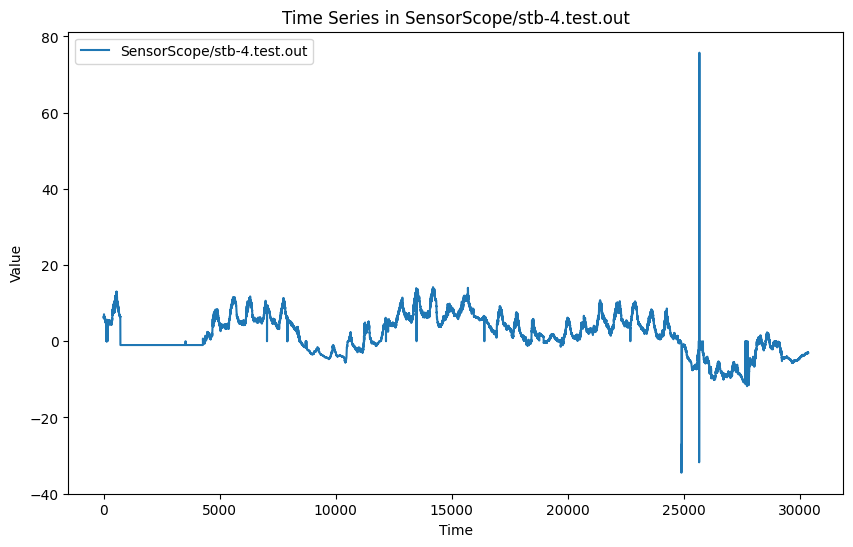

Filename: stb-20.test.out


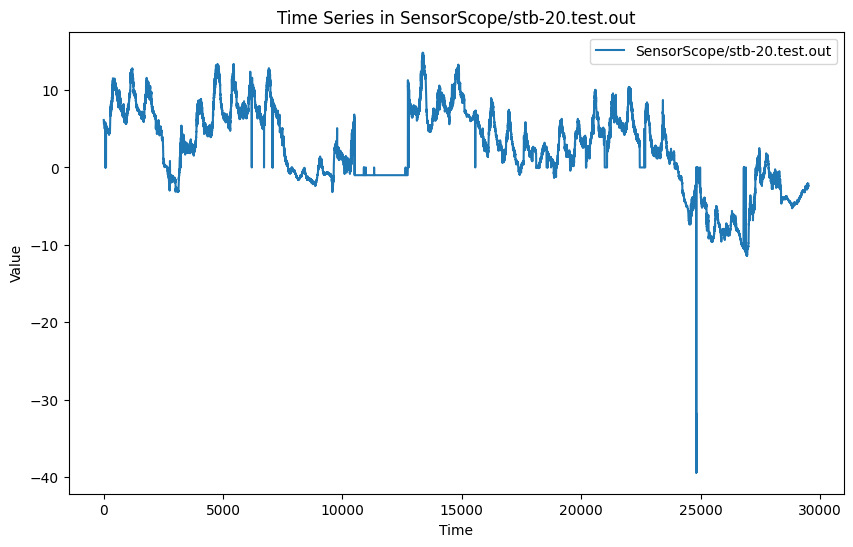

Filename: stb-31.test.out


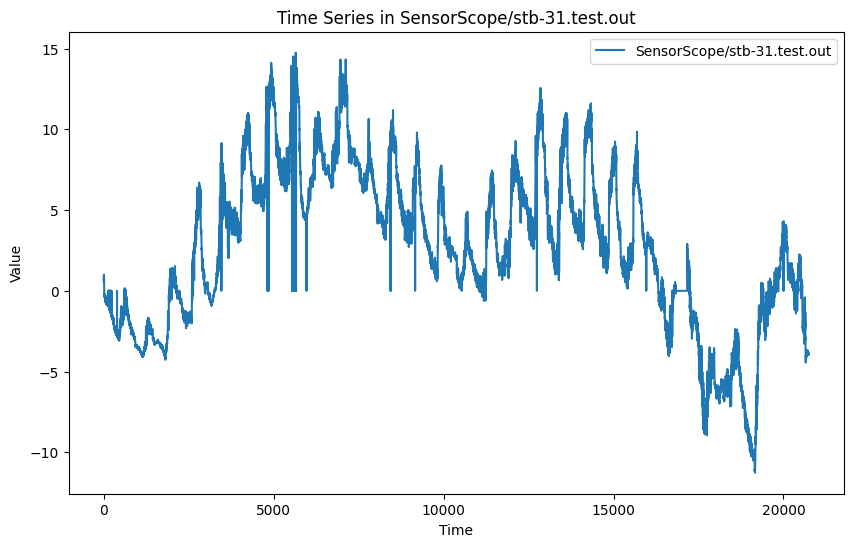

Filename: stb-19.test.out


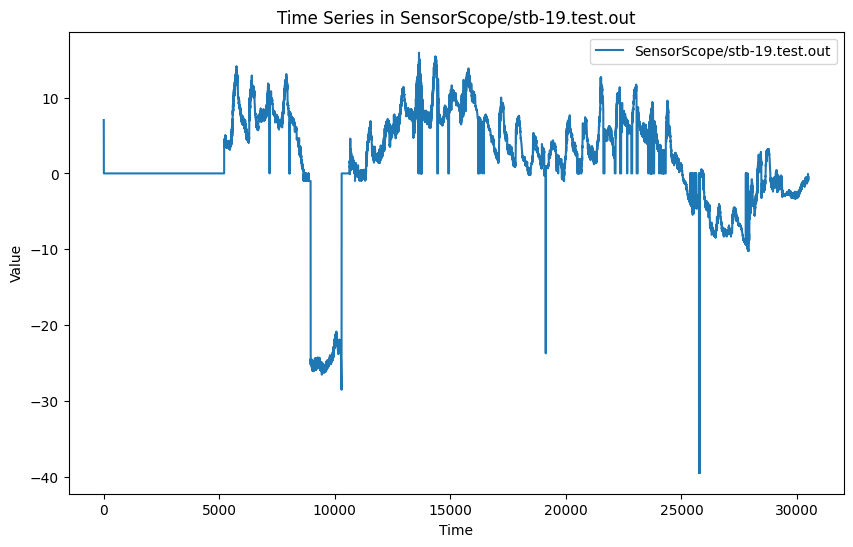

Filename: stb-3.test.out


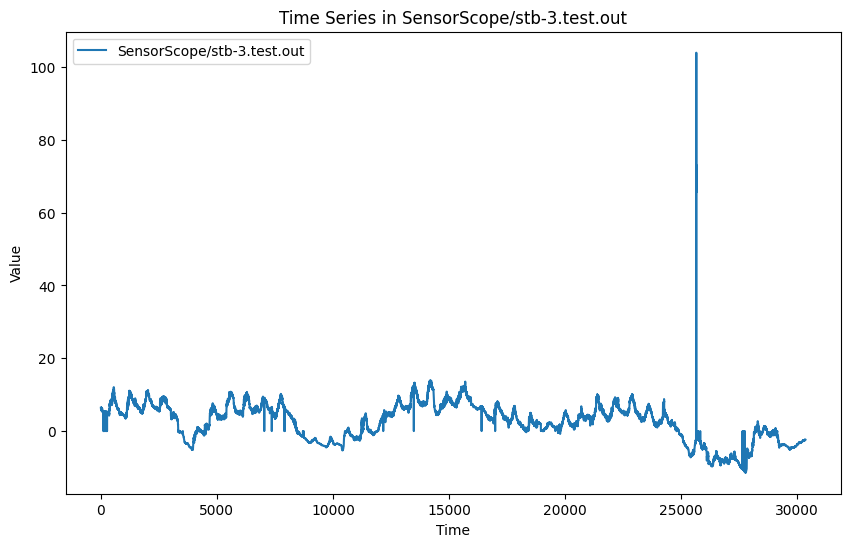

Filename: stb-7.test.out


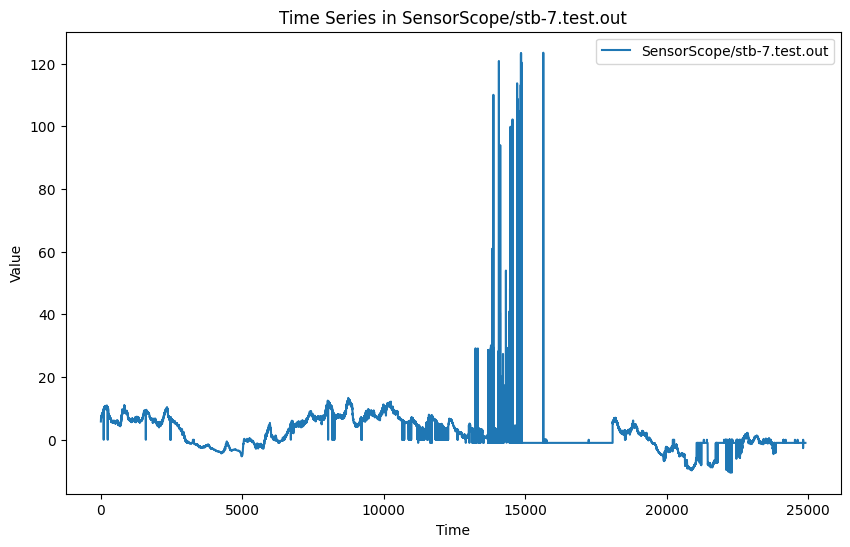

Filename: stb-11.test.out


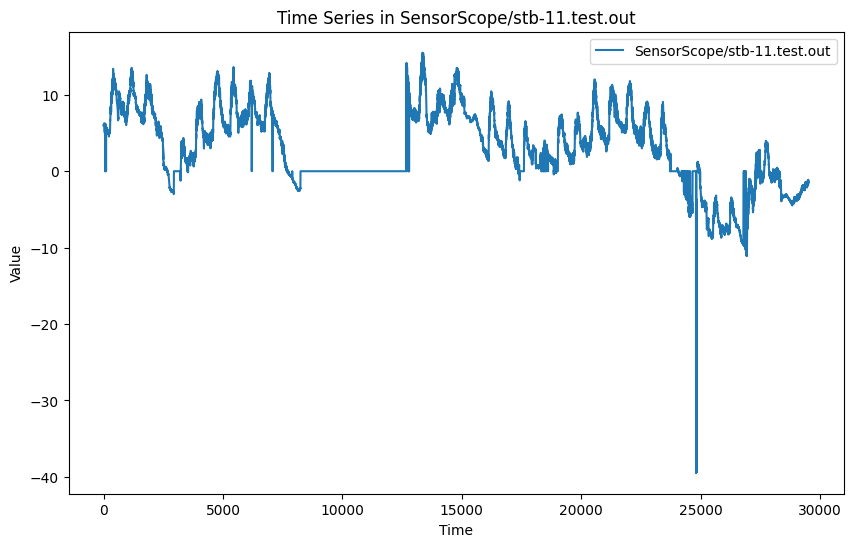

Filename: stb-25.test.out


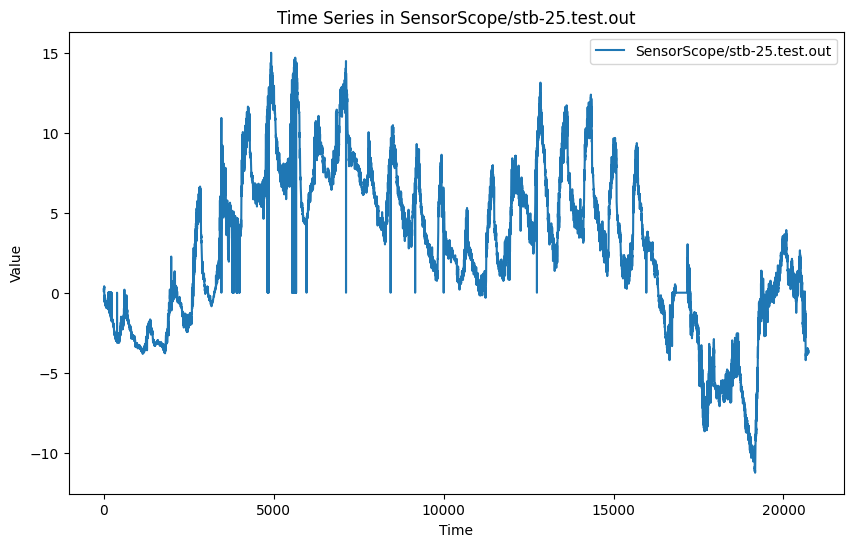

Filename: stb-12.test.out


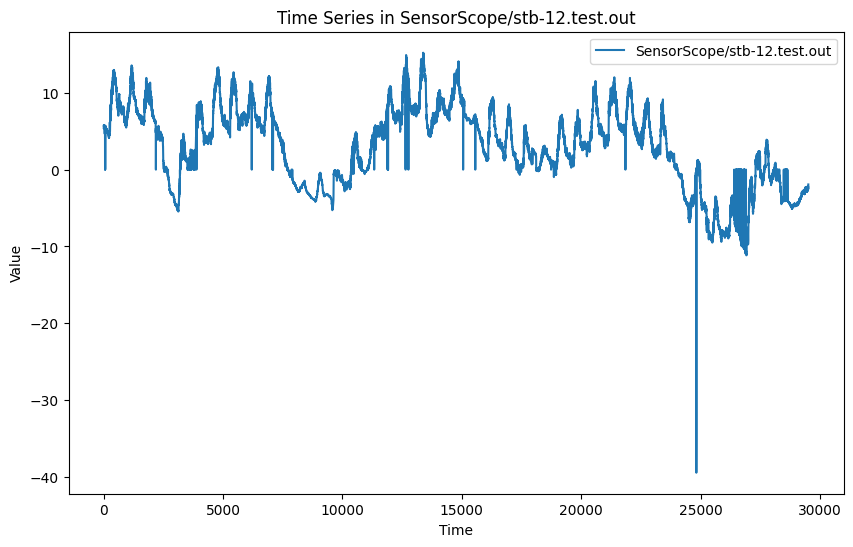

Filename: stb-13.test.out


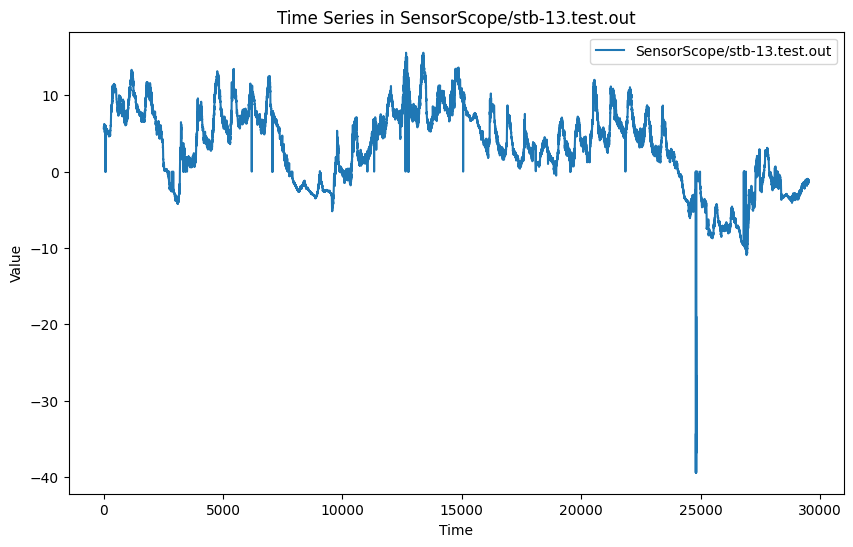

Filename: stb-6.test.out


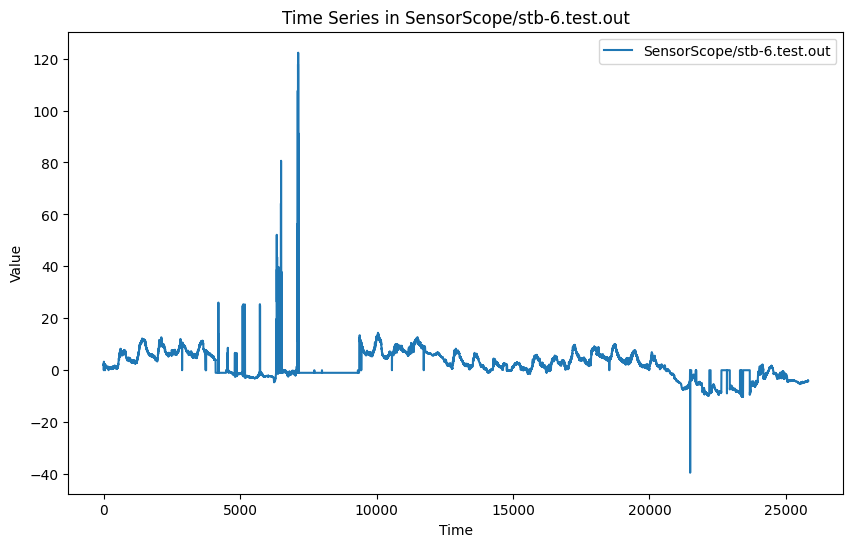

Filename: stb-15.test.out


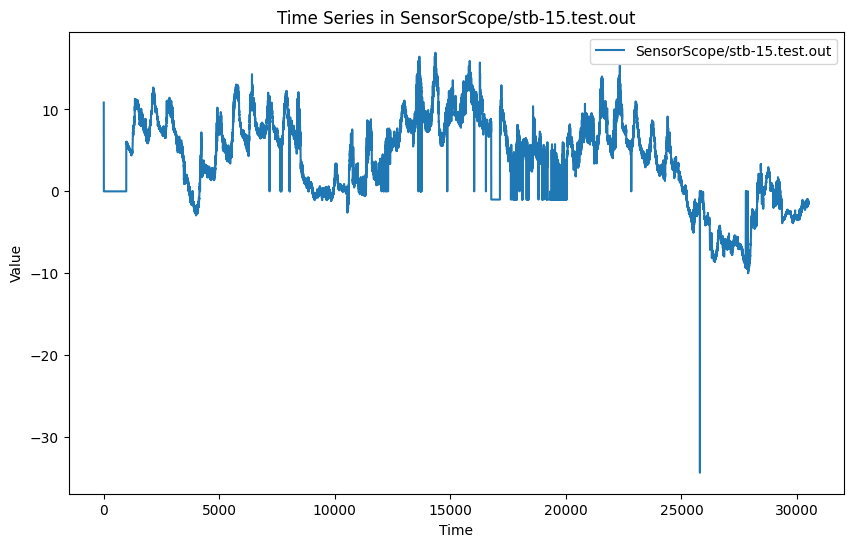

Filename: stb-8.test.out


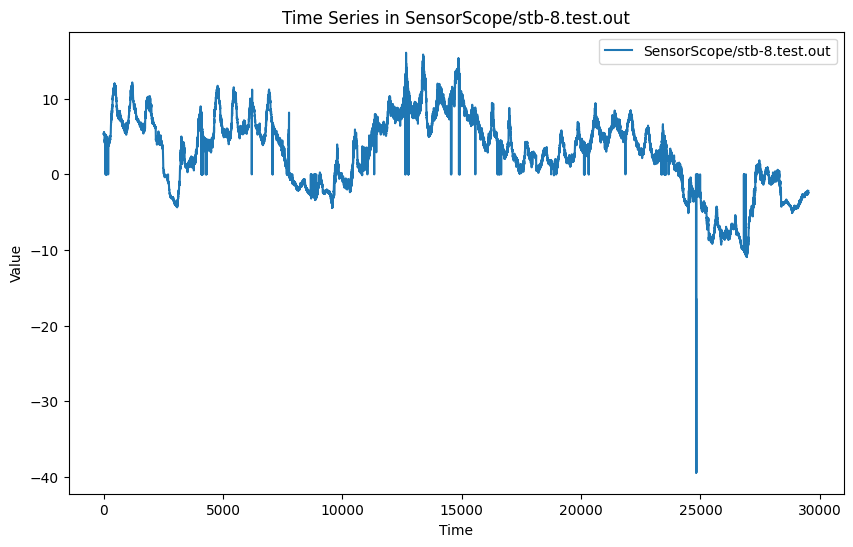

Filename: stb-29.test.out


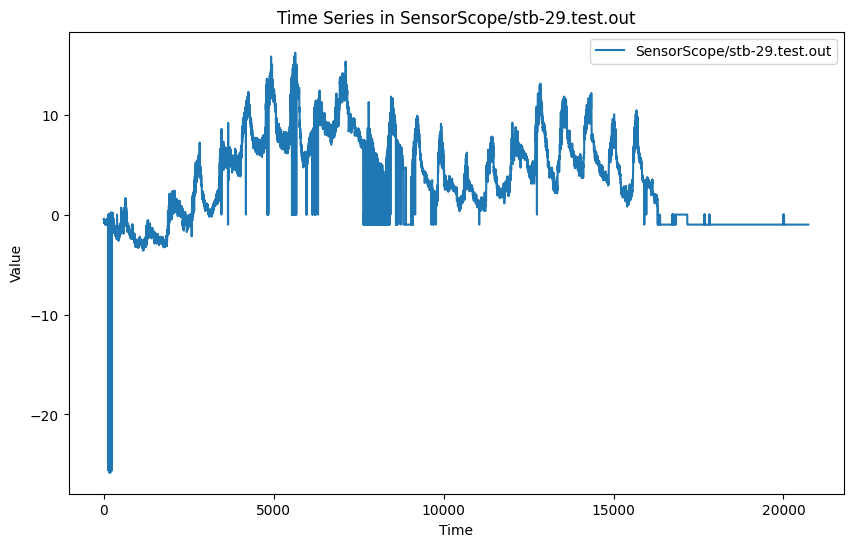

Filename: stb-17.test.out


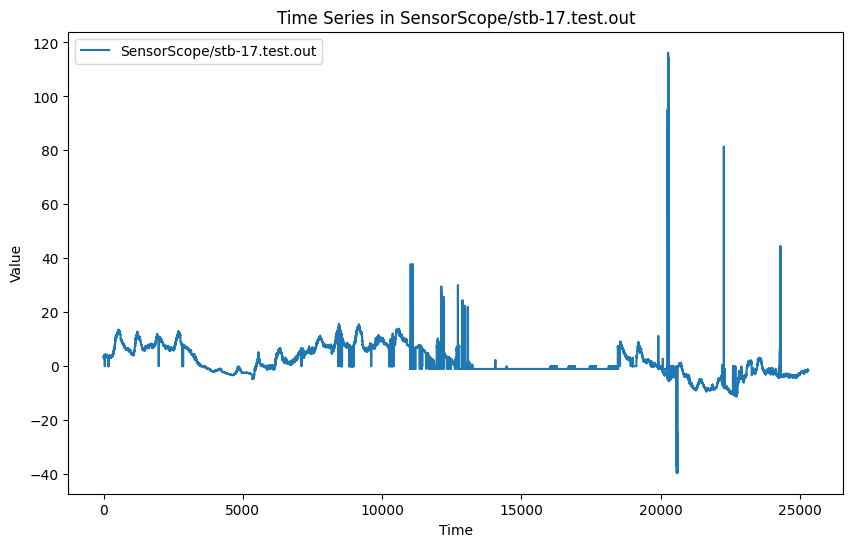

Filename: stb-2.test.out


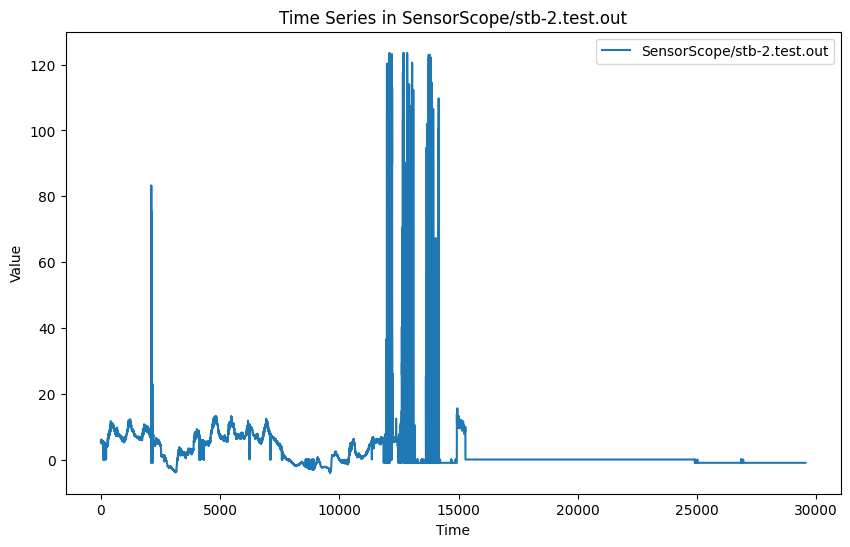

Filename: stb-9.test.out


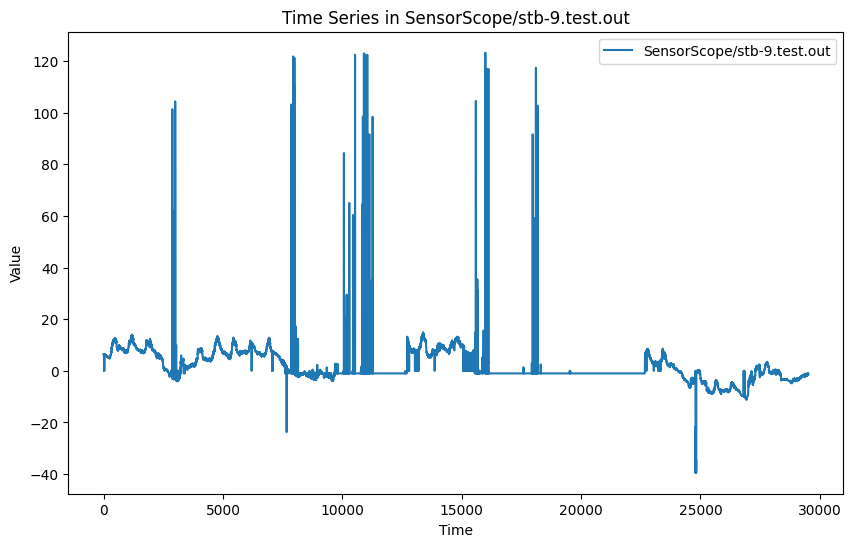

Filename: stb-18.test.out


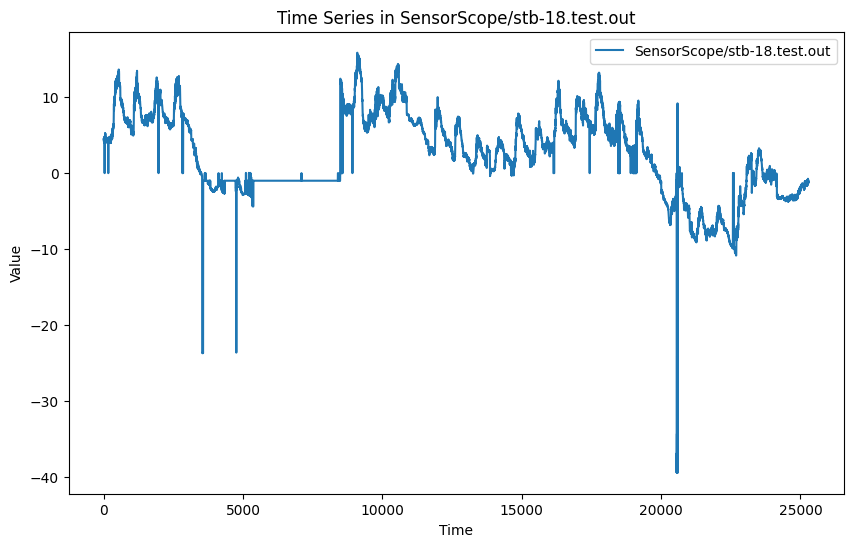

In [16]:
n = 5

for subfolder, files in sorted_subfolders[:n]:
    print(f"Plotting for subfolder: {subfolder}")
    for file in files:
        print(f"Filename: {file}")
        file_path = os.path.join(tsb_uad_pub_folder_path, subfolder, file)
        if not os.path.isfile(file_path):
            print(f"File not found: {file_path}")
            continue
        df = pd.read_csv(file_path)
        plt.figure(figsize=(10, 6))
        plt.plot(df.index, df.iloc[:, 0], label=f'{subfolder}/{file}')
        plt.title(f'Time Series in {subfolder}/{file}')
        plt.xlabel('Time')
        plt.ylabel('Value')
        plt.legend()
        plt.show()

## Plot n Time-Series (TS) from all subfolders

Plotting for subfolder: Dodgers
Filename: 101-freeway-traffic.test.out


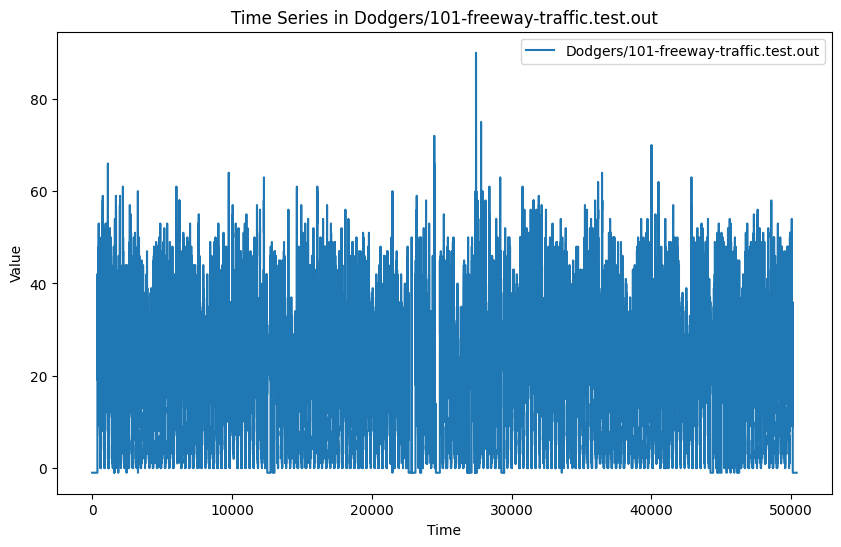

Plotting for subfolder: Genesis
Filename: genesis-anomalies.test.csv@17.out


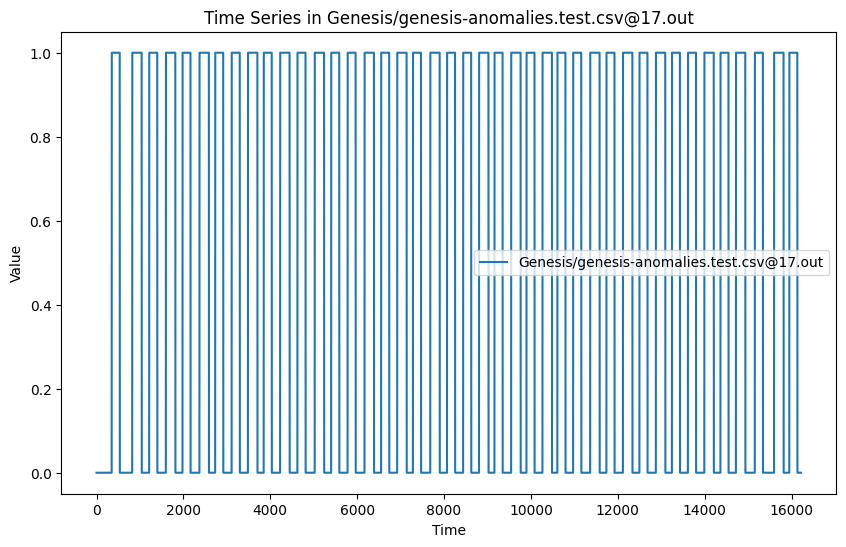

Filename: genesis-anomalies.test.csv@13.out


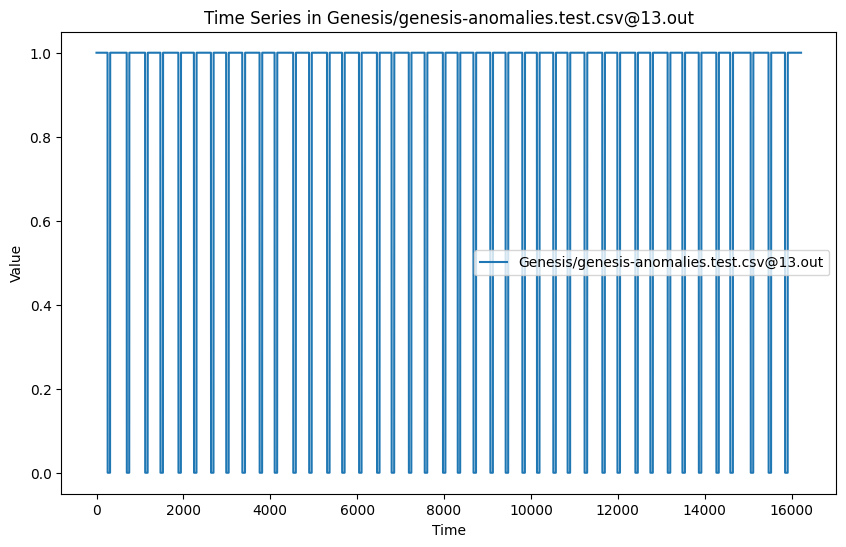

Filename: genesis-anomalies.test.csv@6.out


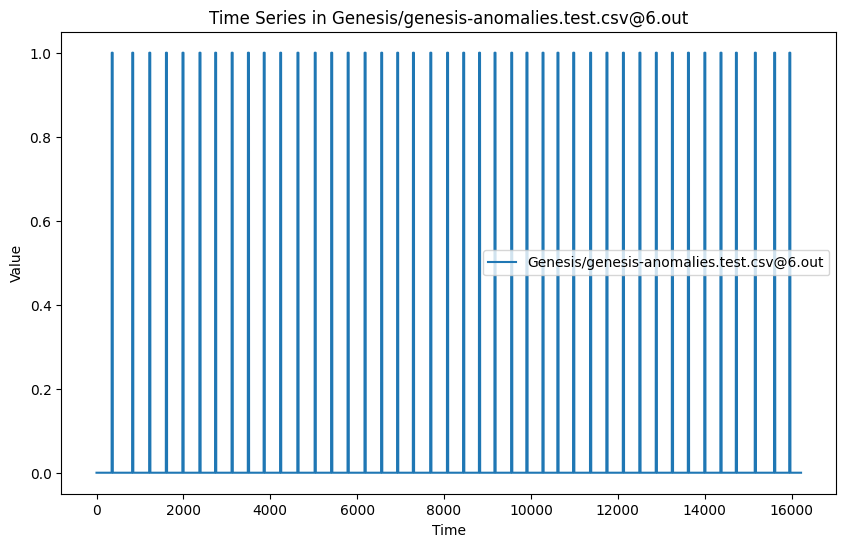

Filename: genesis-anomalies.test.csv@3.out


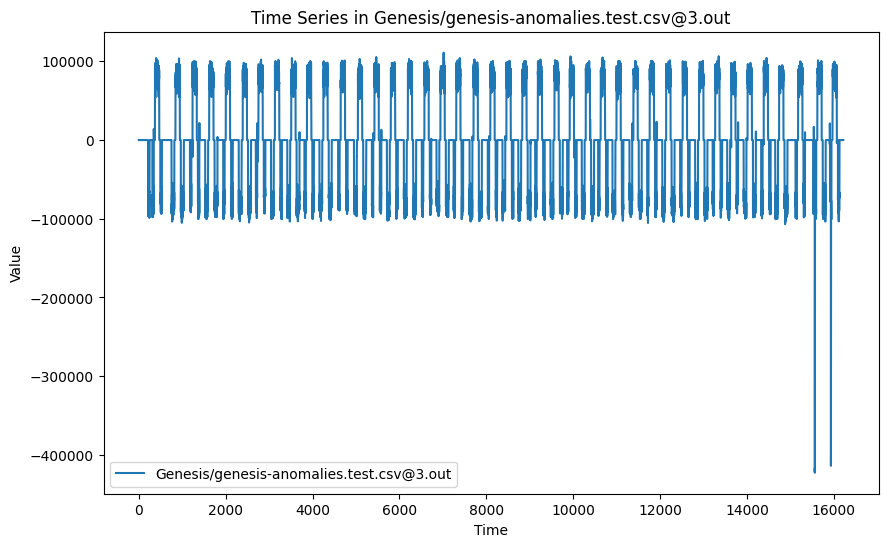

Plotting for subfolder: MGAB
Filename: 1.test.out


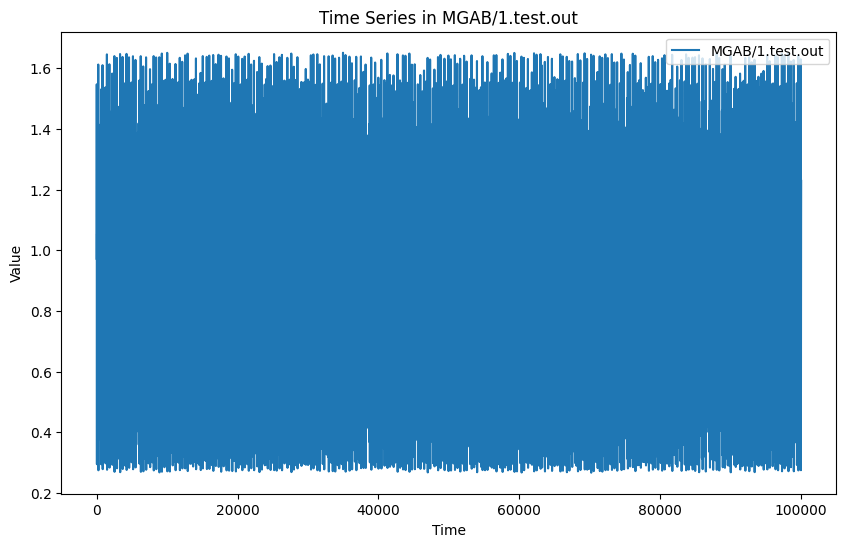

Filename: 4.test.out


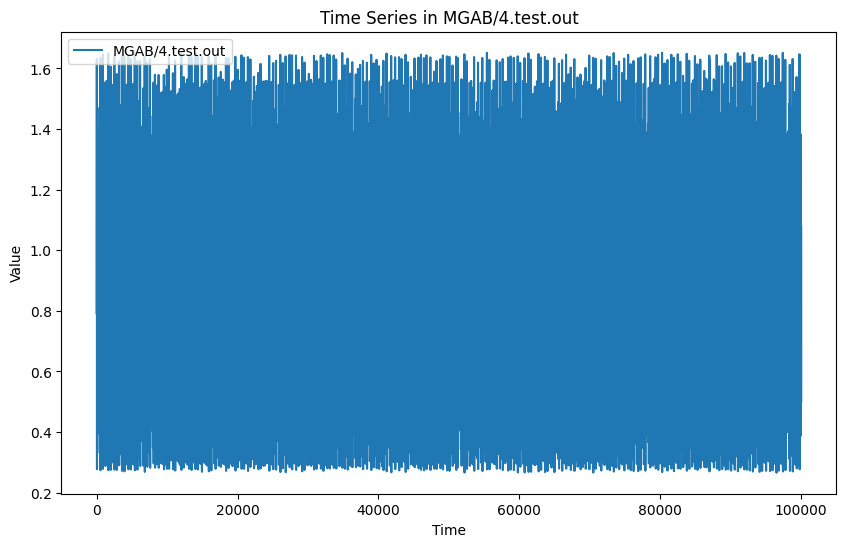

Filename: 8.test.out


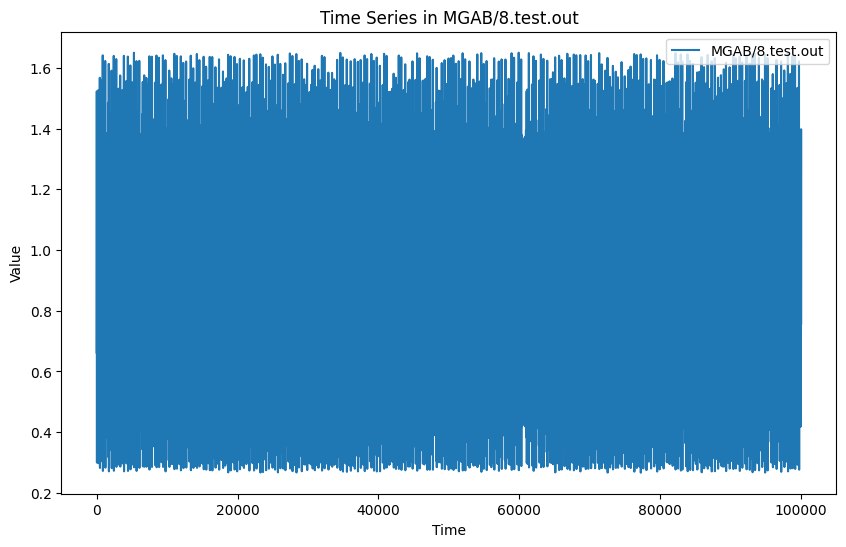

Filename: 10.test.out


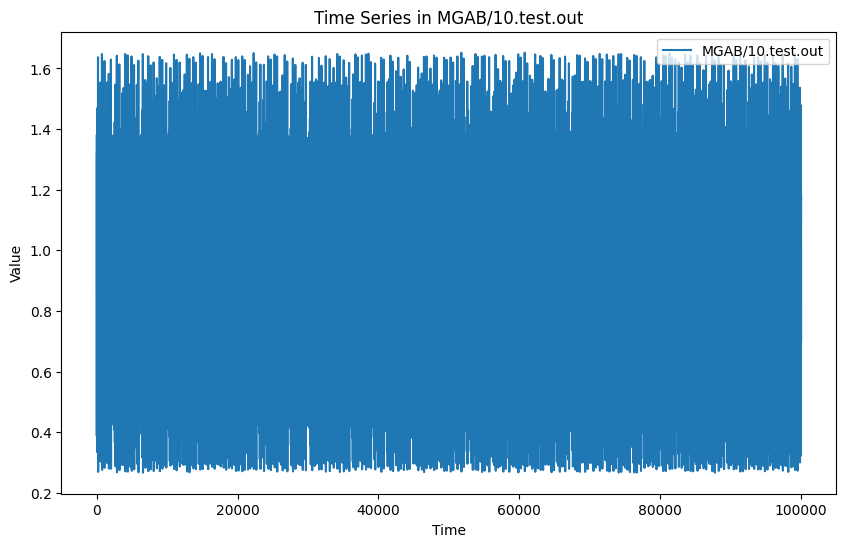

Plotting for subfolder: Occupancy
Filename: room-occupancy-0.test.csv@4.out


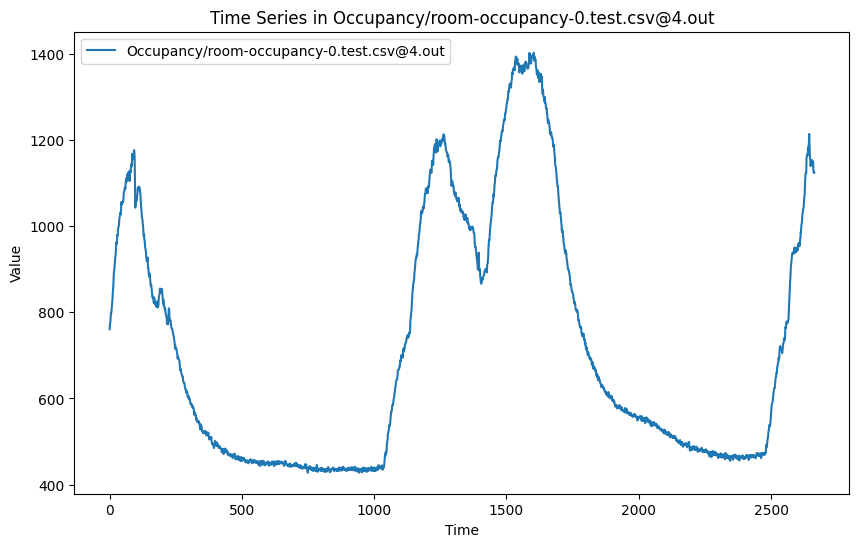

Filename: room-occupancy.train.csv@3.out


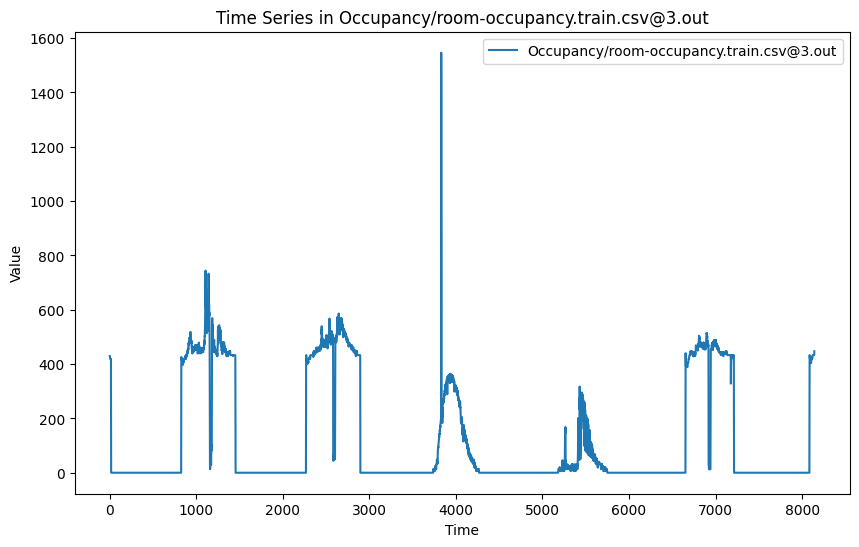

Filename: room-occupancy-0.test.csv@3.out


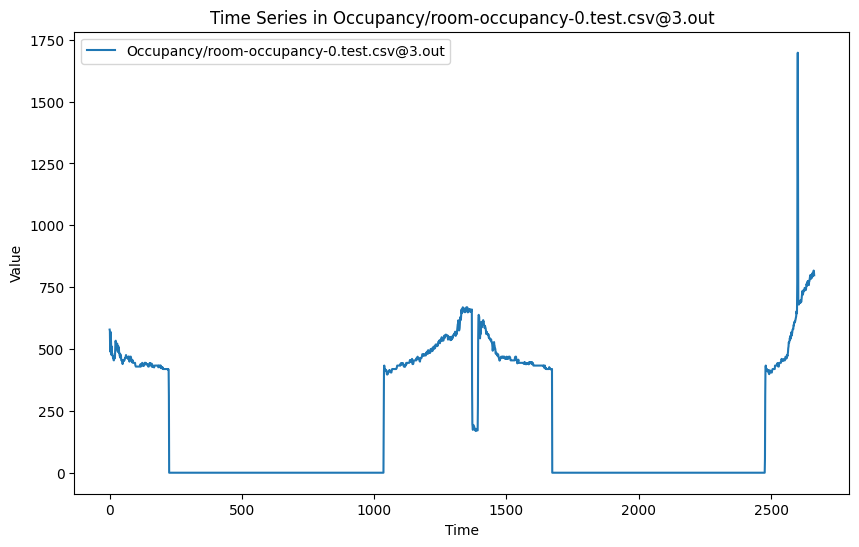

Filename: room-occupancy-1.test.csv@4.out


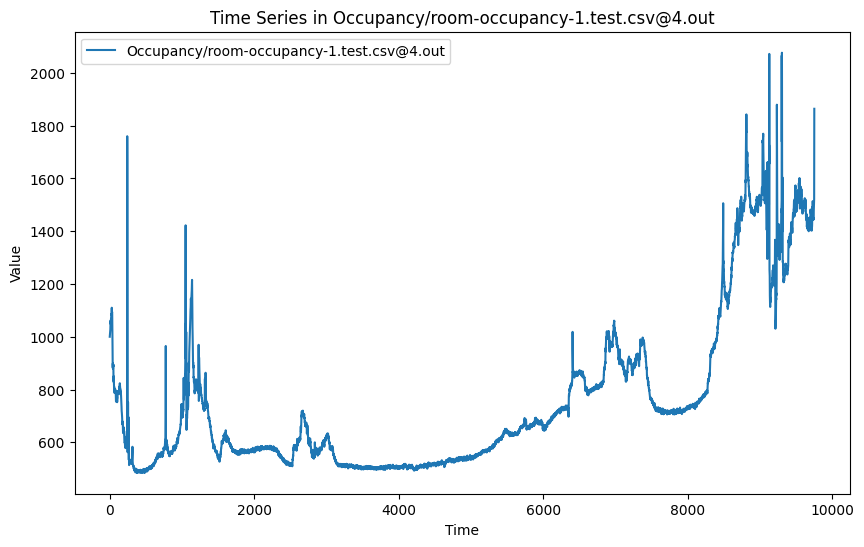

Plotting for subfolder: SensorScope
Filename: stb-10.test.out


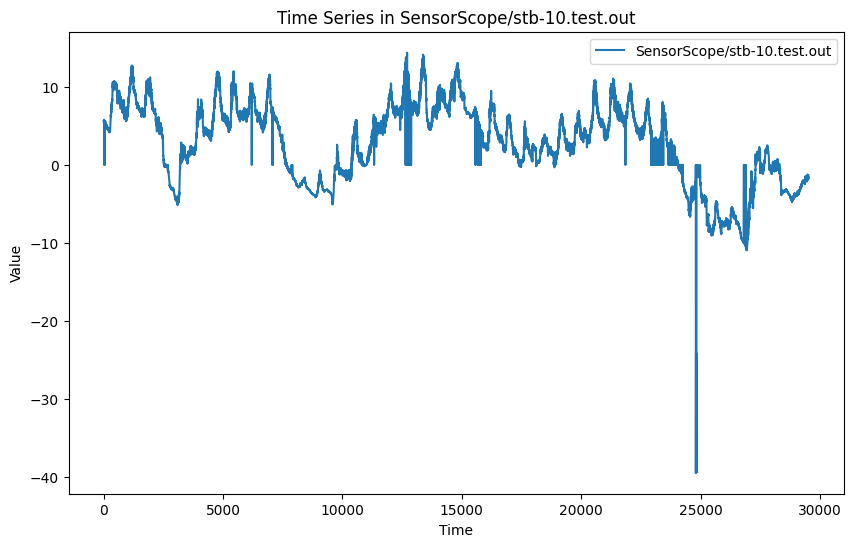

Filename: stb-32.test.out


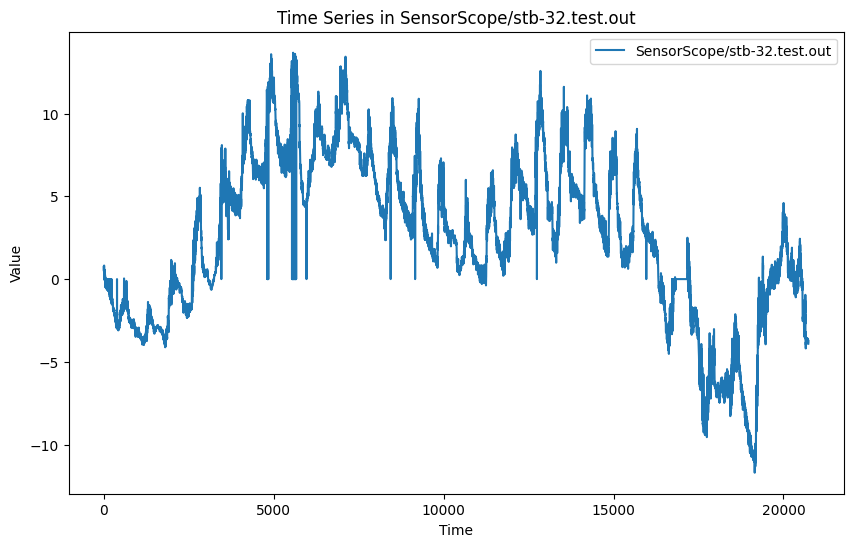

Filename: stb-28.test.out


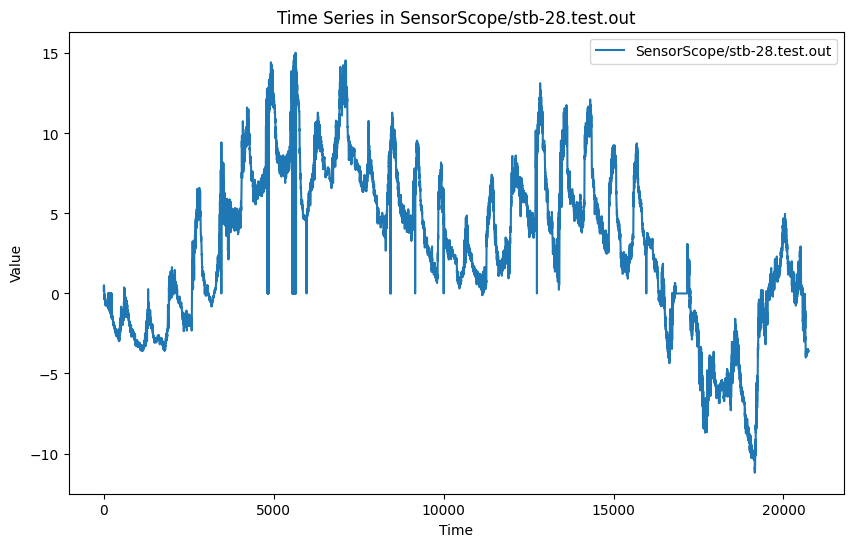

Filename: stb-14.test.out


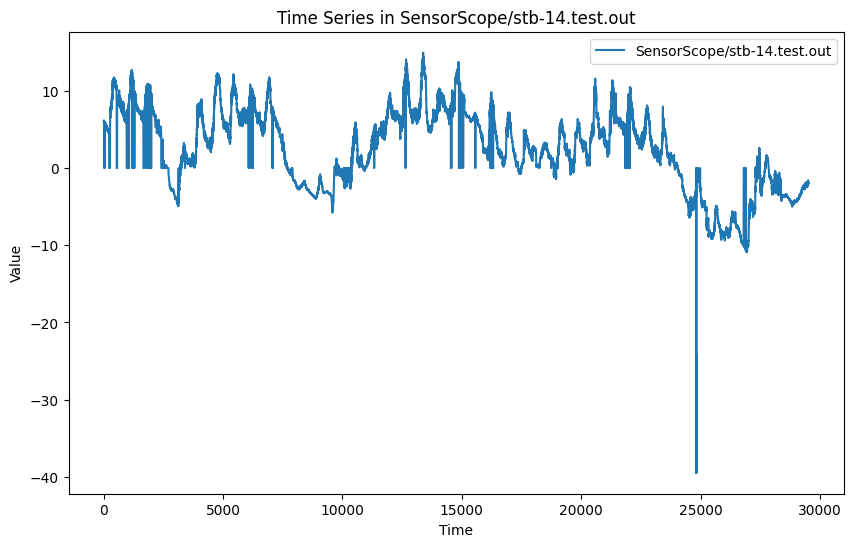

Plotting for subfolder: MITDB
Filename: 234.test.csv@2.out


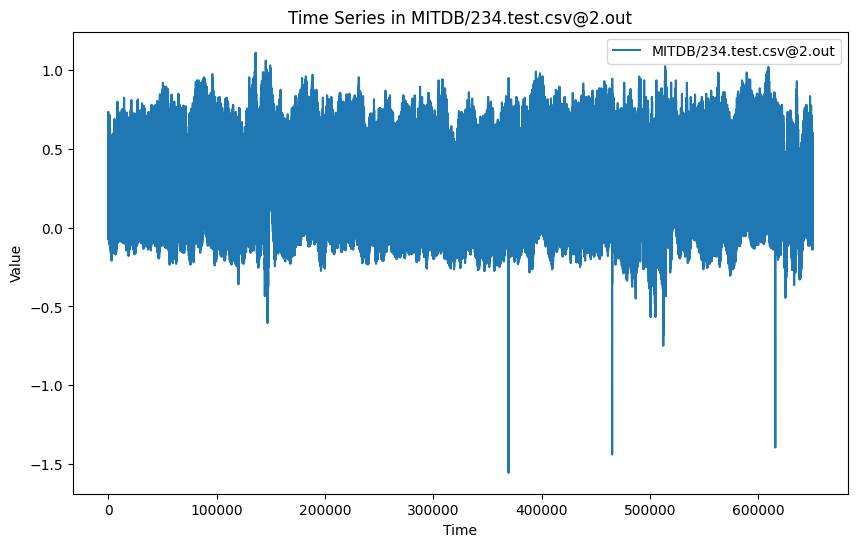

Filename: 223.test.csv@1.out


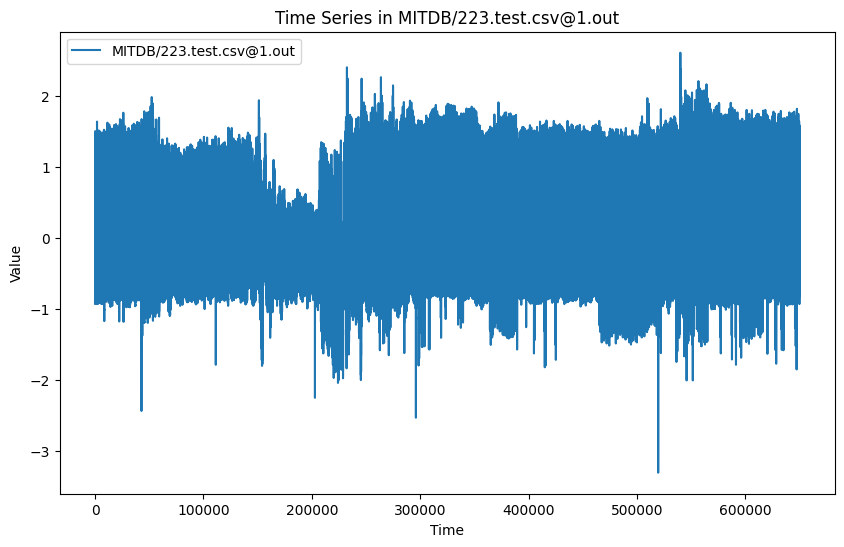

Filename: 118.test.csv@2.out


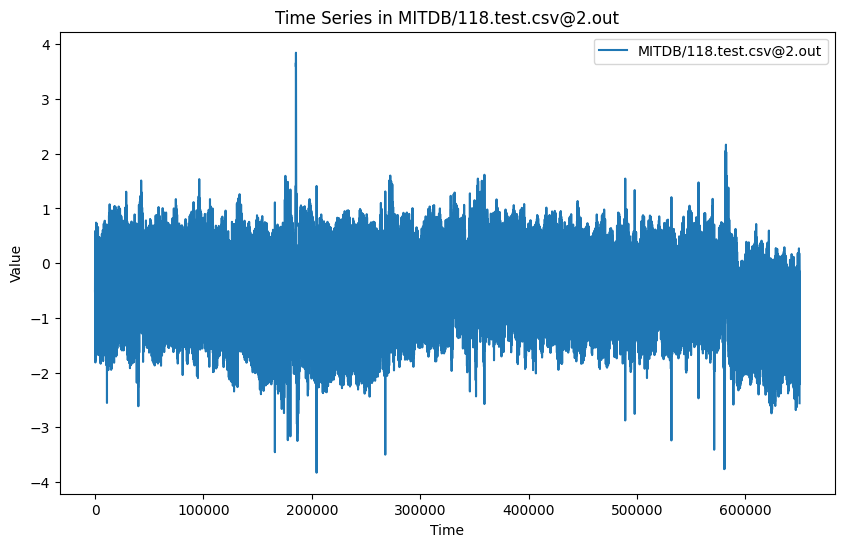

Filename: 118.test.csv@1.out


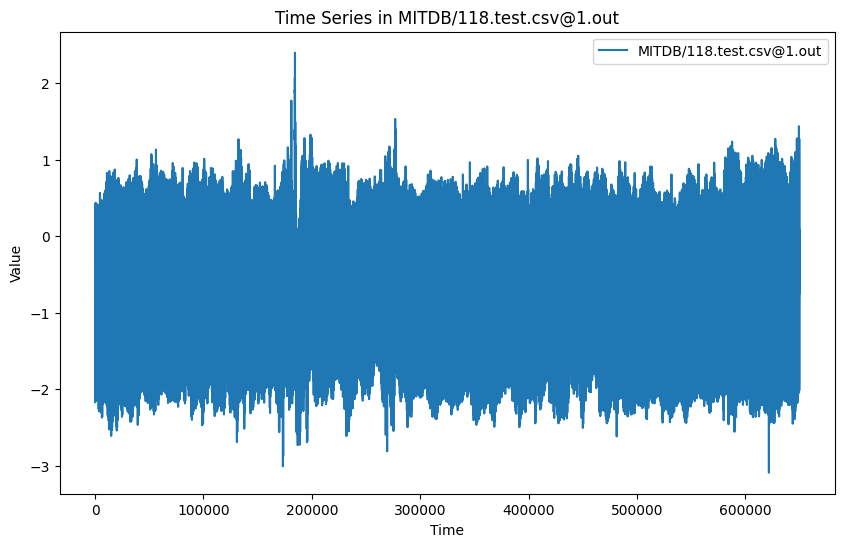

Plotting for subfolder: Daphnet
Filename: S03R03E4.test.csv@1.out


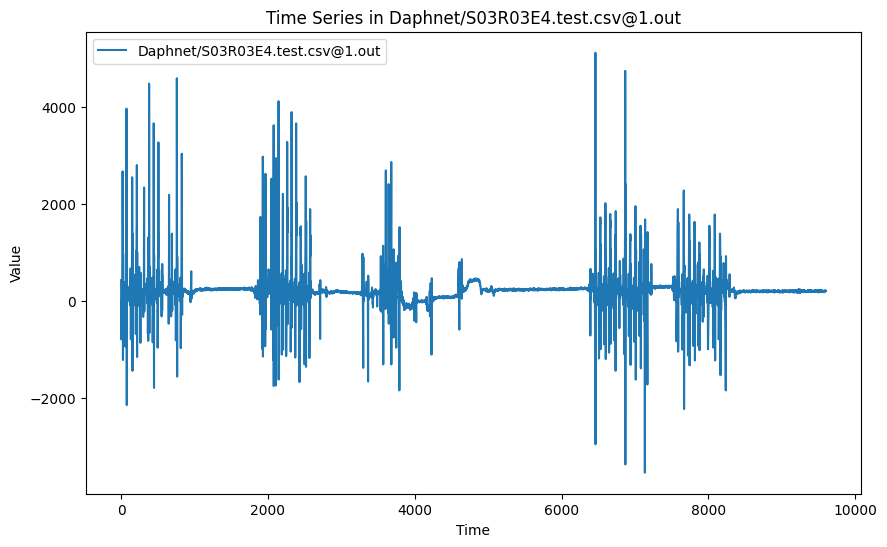

Filename: S09R01E0.test.csv@8.out


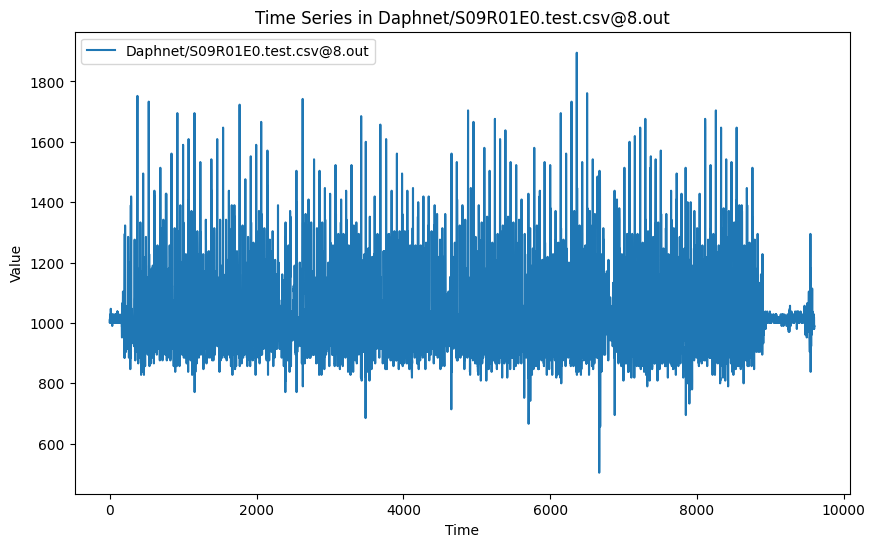

Filename: S03R01E1.test.csv@2.out


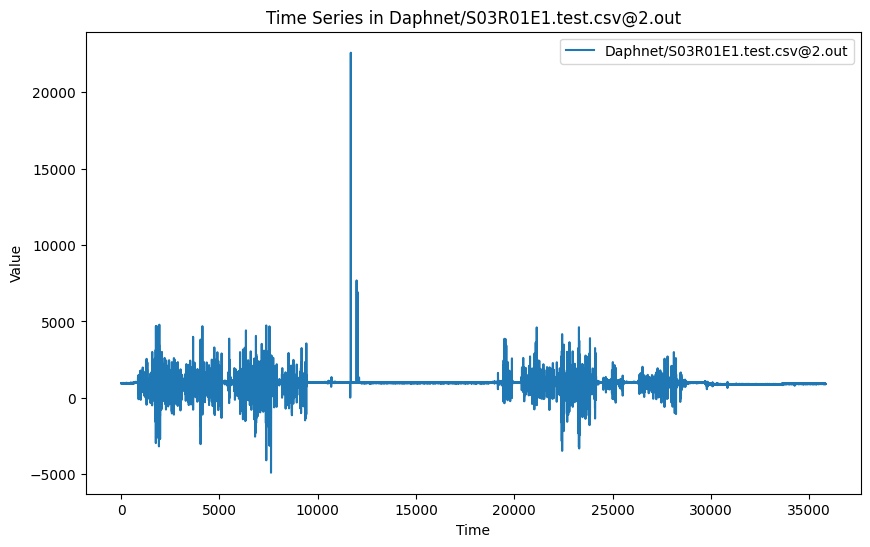

Filename: S03R01E1.test.csv@4.out


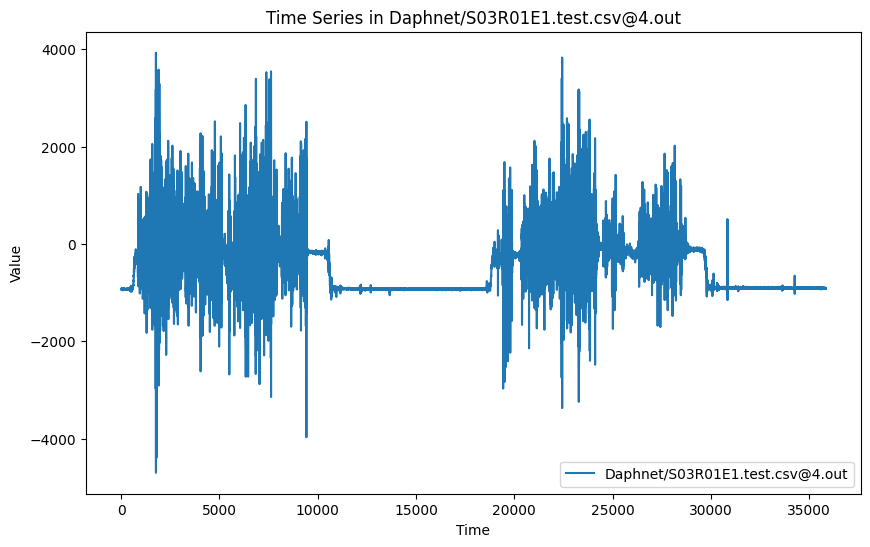

Plotting for subfolder: ECG
Filename: MBA_ECG14046_data_18.out


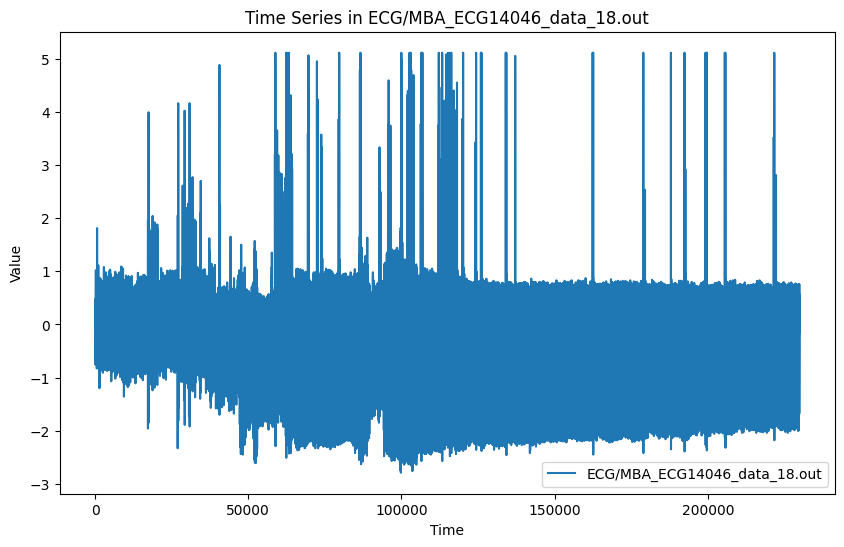

Filename: MBA_ECG801_data.out


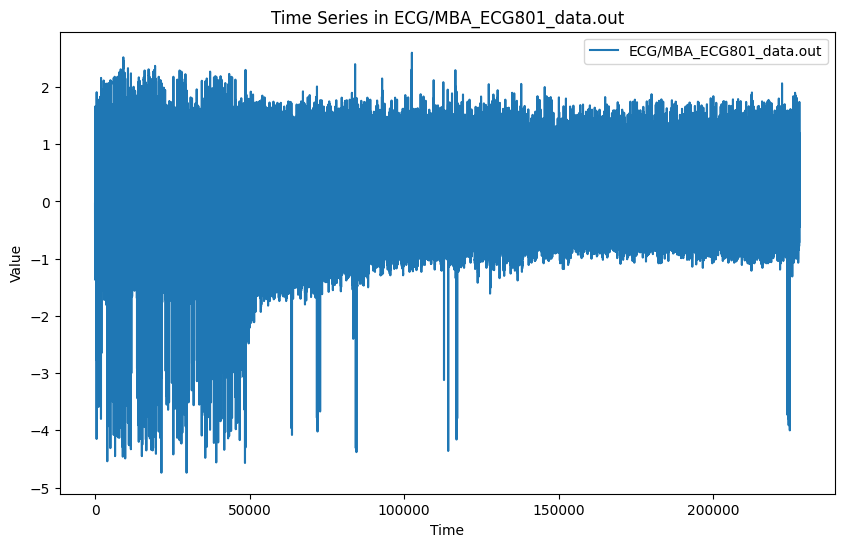

Filename: MBA_ECG14046_data_0.out


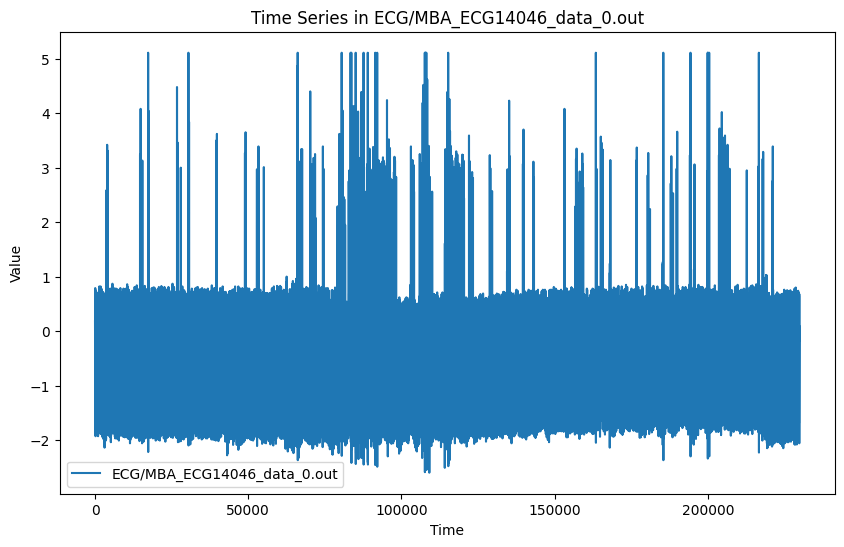

Filename: MBA_ECG820_data.out


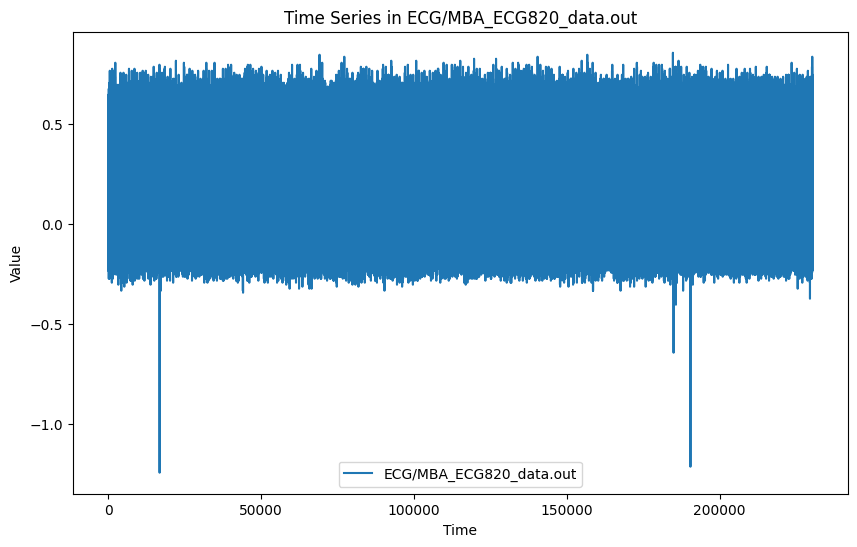

Plotting for subfolder: NASA-MSL
Filename: T-13.test.out


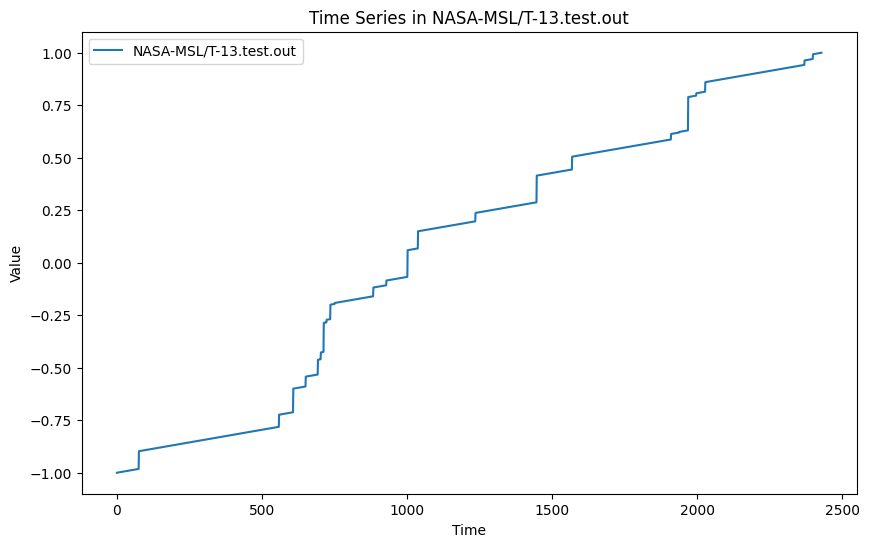

Filename: C-2.train.out


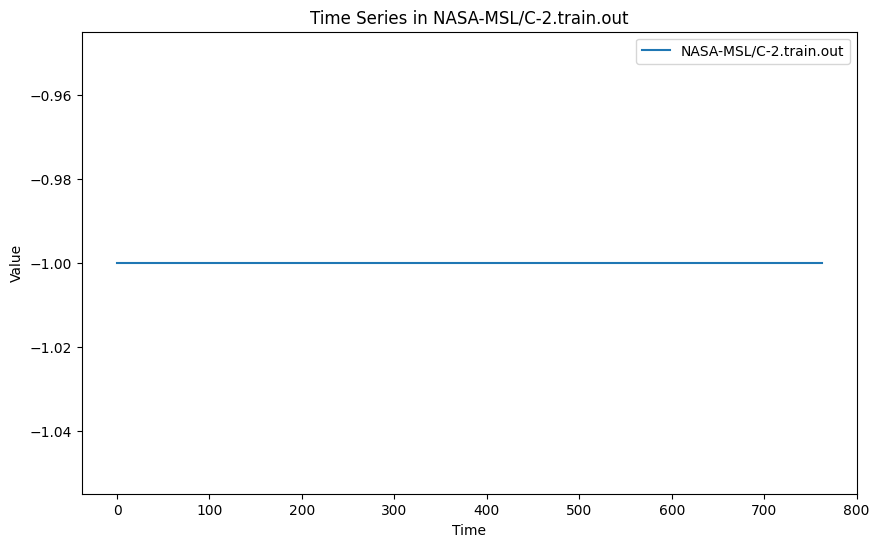

Filename: T-9.train.out


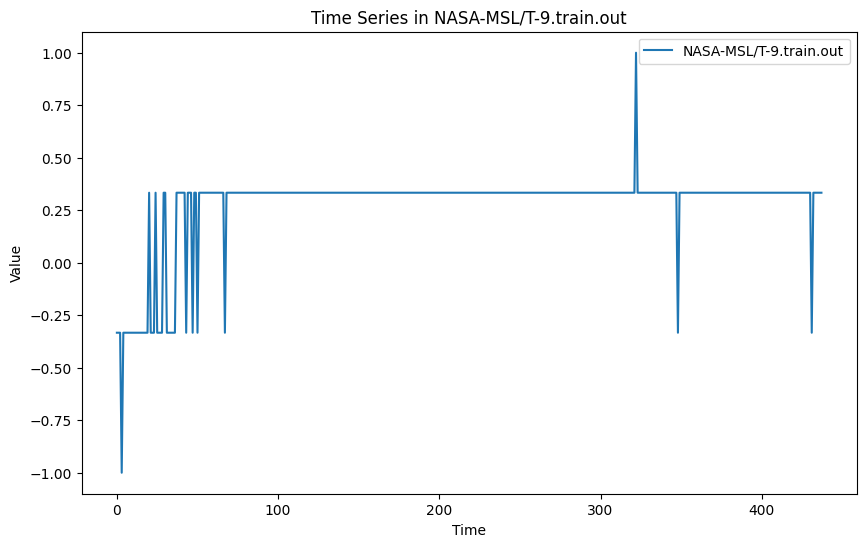

Filename: M-4.test.out


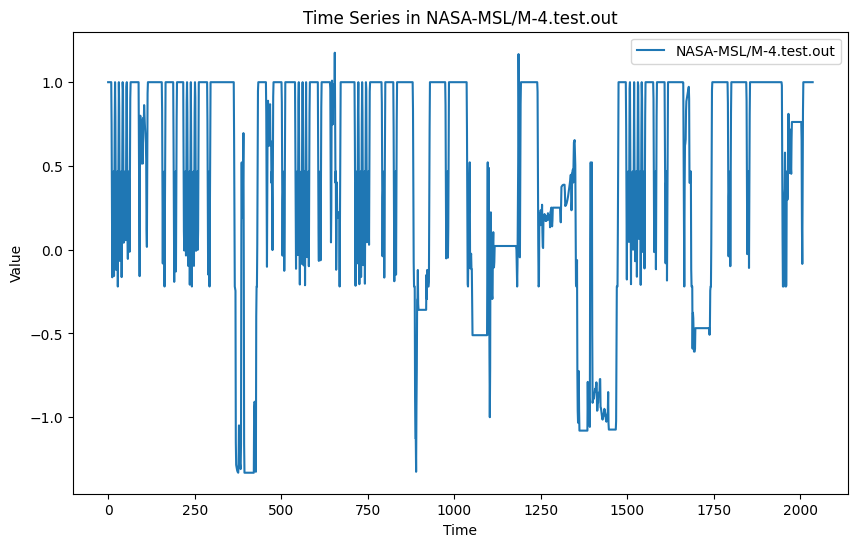

Plotting for subfolder: IOPS
Filename: KPI-a07ac296-de40-3a7c-8df3-91f642cc14d0.train.out


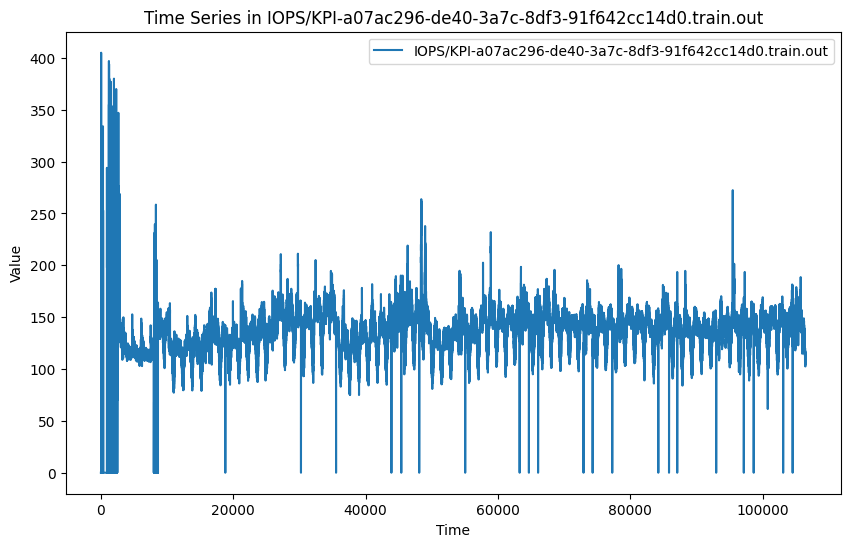

Filename: KPI-ab216663-dcc2-3a24-b1ee-2c3e550e06c9.test.out


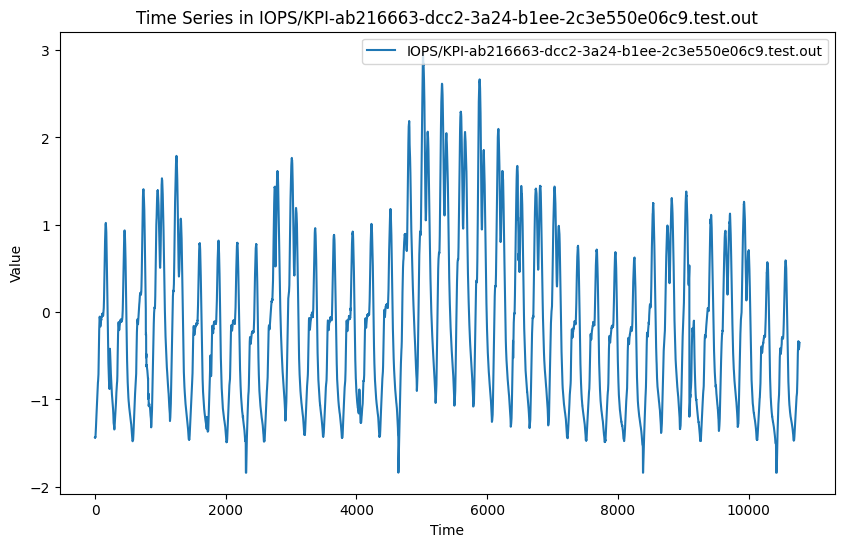

Filename: KPI-57051487-3a40-3828-9084-a12f7f23ee38.train.out


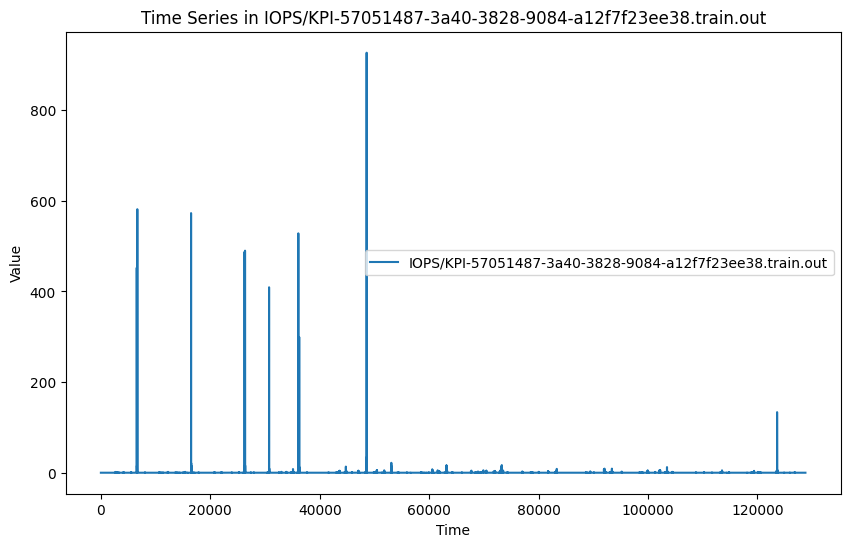

Filename: KPI-e0747cad-8dc8-38a9-a9ab-855b61f5551d.train.out


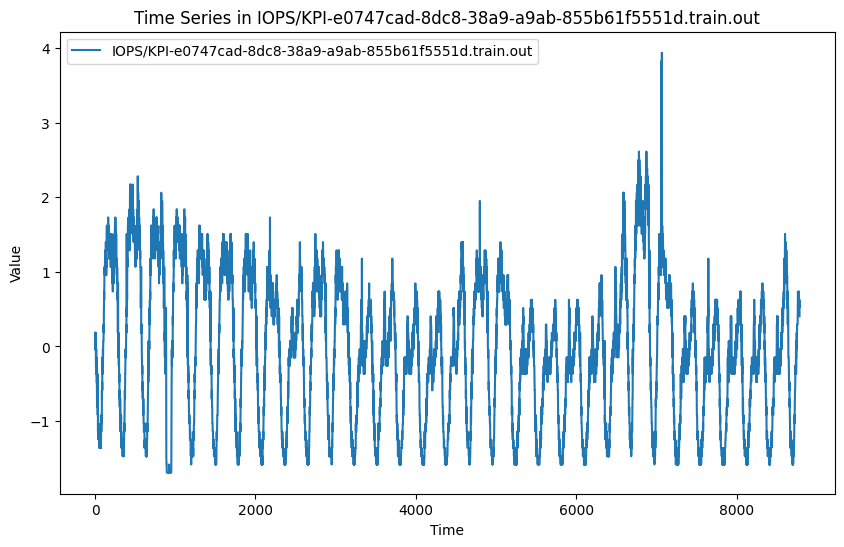

Plotting for subfolder: NAB
Filename: NAB_data_Exchange_4.out


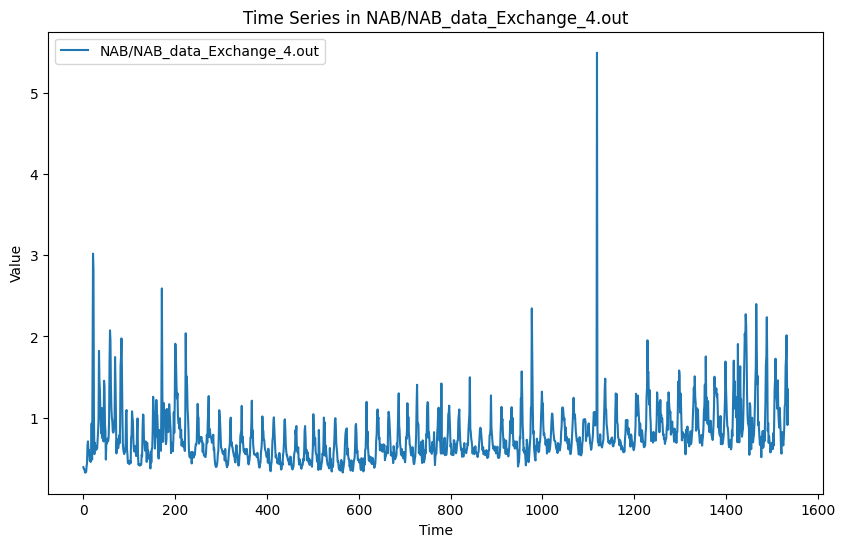

Filename: NAB_data_art1_1.out


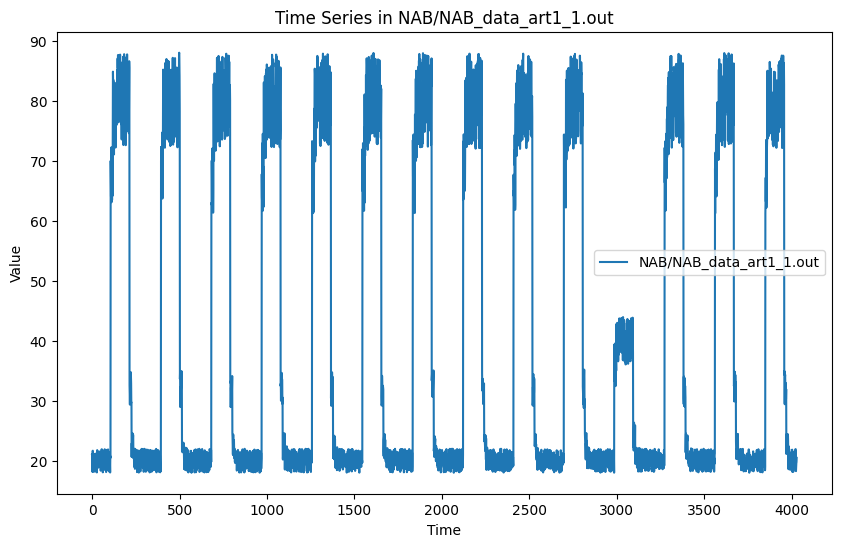

Filename: NAB_data_art1_5.out


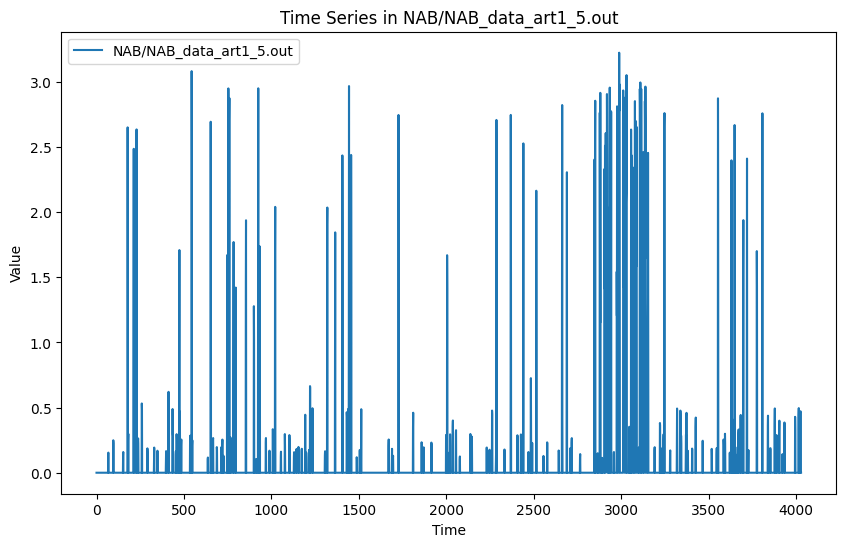

Filename: NAB_data_CloudWatch_4.out


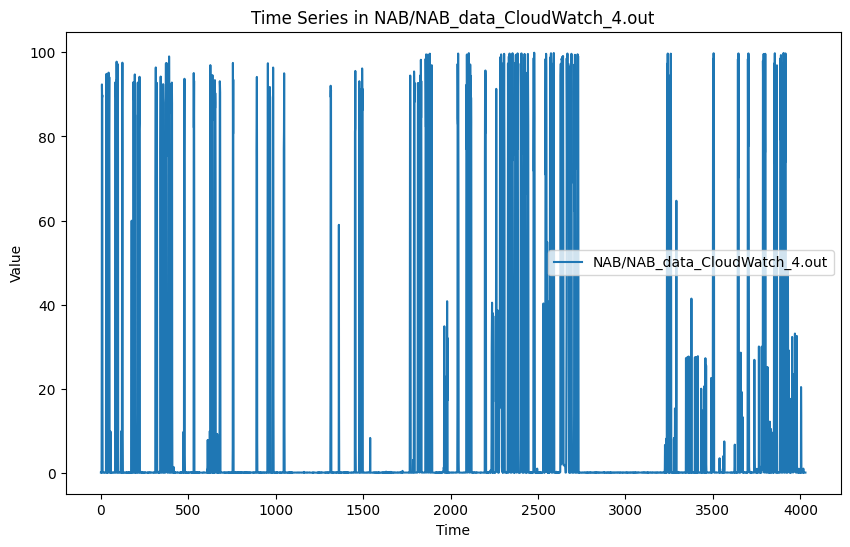

Plotting for subfolder: NASA-SMAP
Filename: A-4.train.out


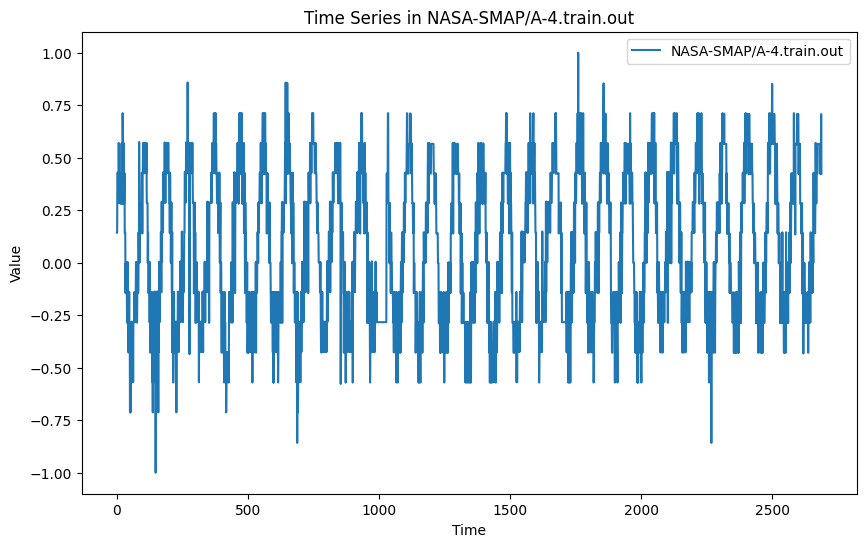

Filename: E-10.train.out


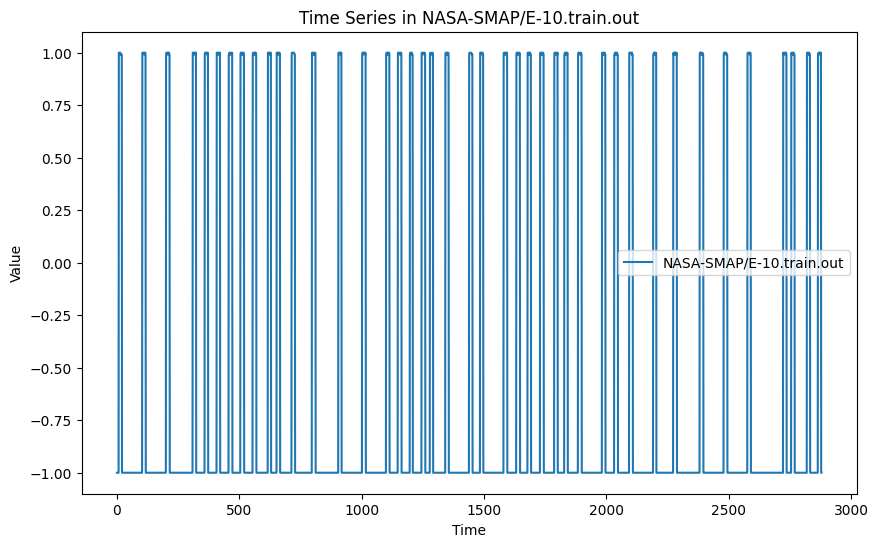

Filename: D-6.test.out


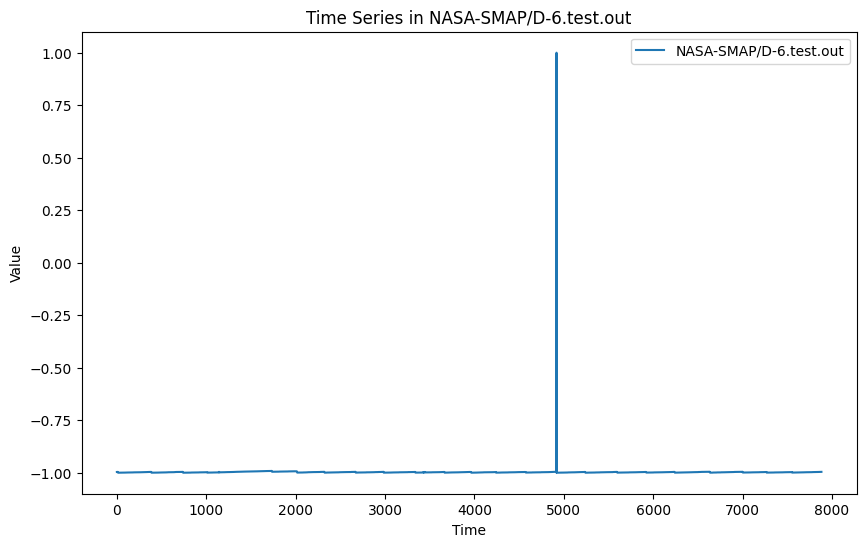

Filename: D-8.test.out


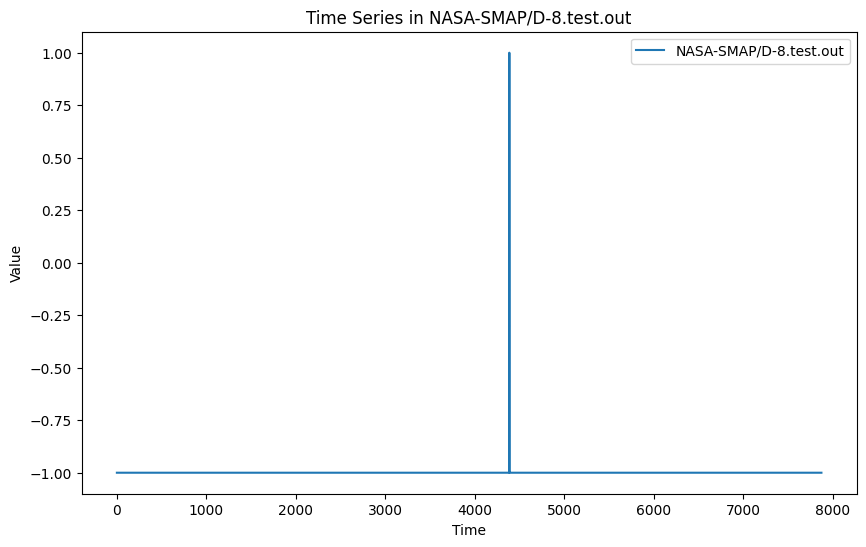

Plotting for subfolder: SVDB
Filename: 893.test.csv@2.out


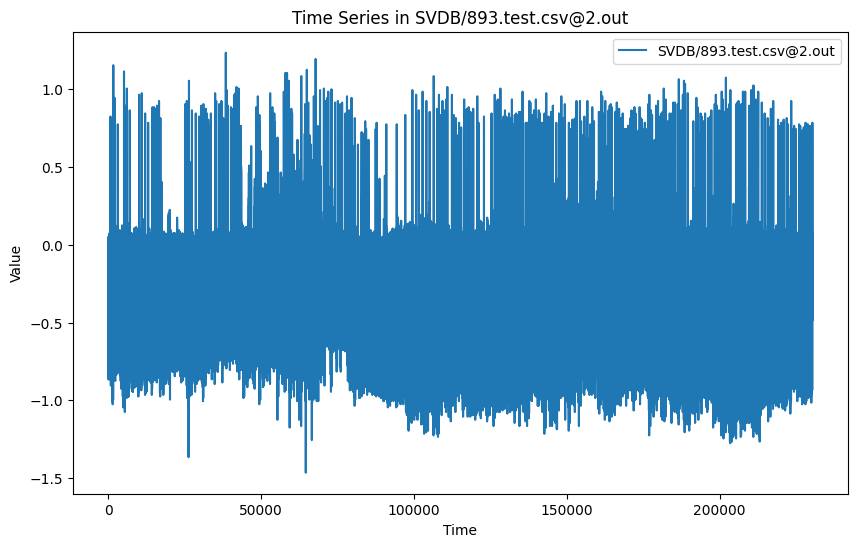

Filename: 857.test.csv@1.out


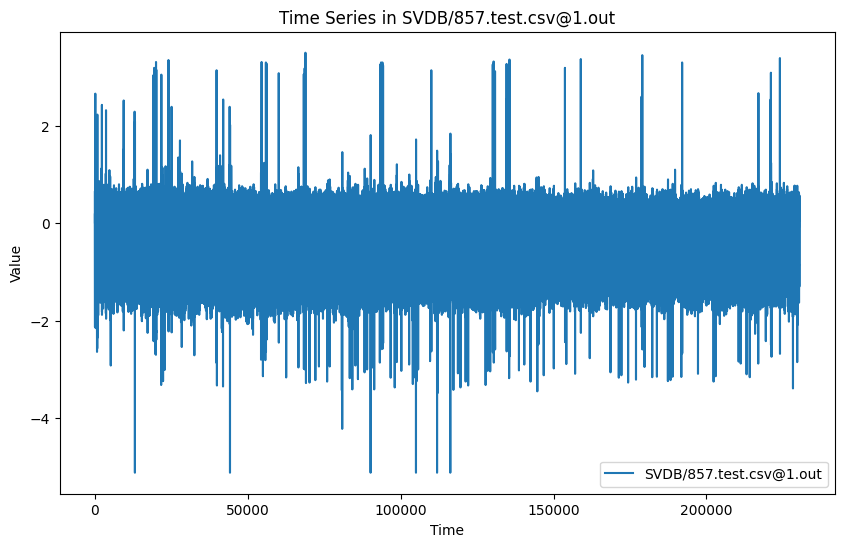

Filename: 850.test.csv@1.out


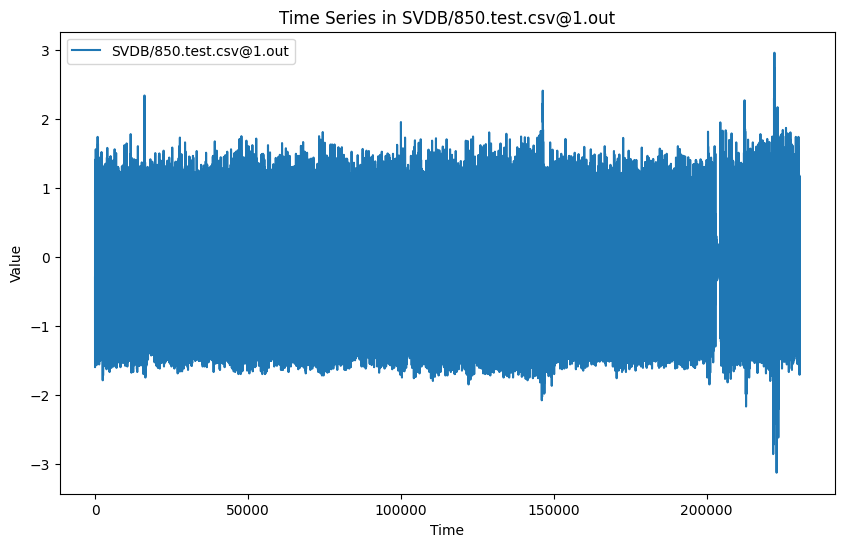

Filename: 811.test.csv@1.out


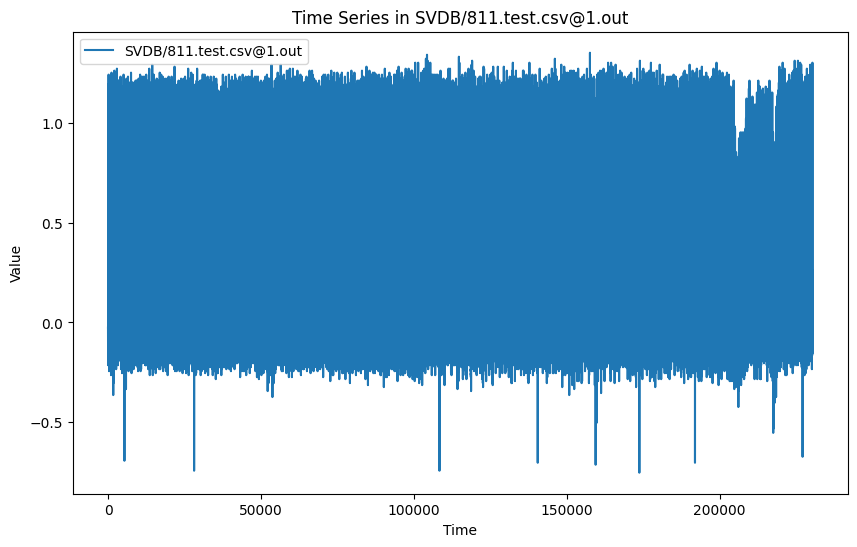

Plotting for subfolder: GHL
Filename: 08_Lev_fault_Temp_corr_seed_33_vars_23.test.csv@2.out


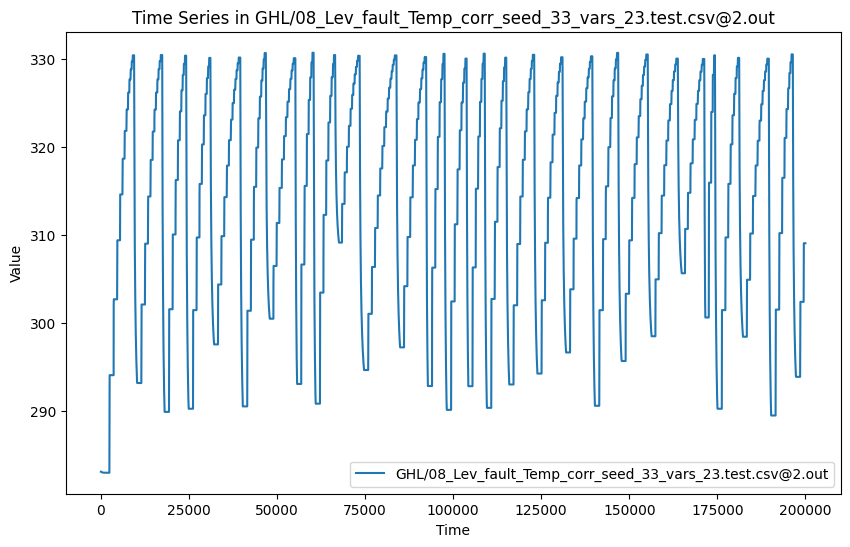

Filename: 02_Lev_fault_Temp_corr_seed_17_vars_23.test.csv@2.out


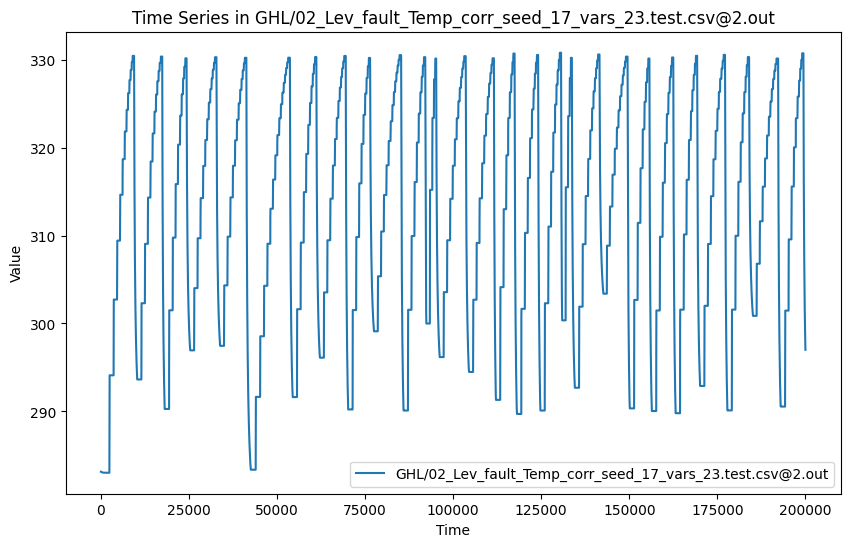

Filename: 04_Lev_fault_Temp_corr_seed_23_vars_23.test.csv@13.out


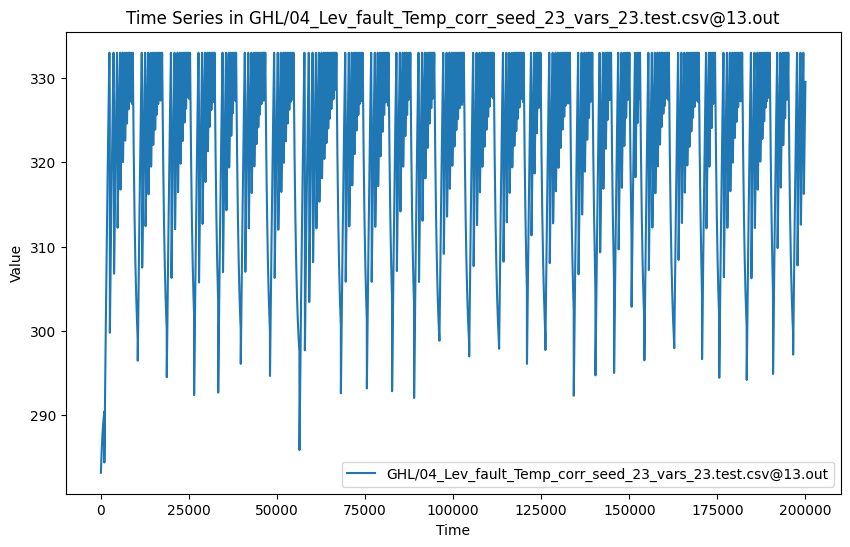

Filename: 22_Lev_fault_Temp_corr_seed_777_vars_23.test.csv@16.out


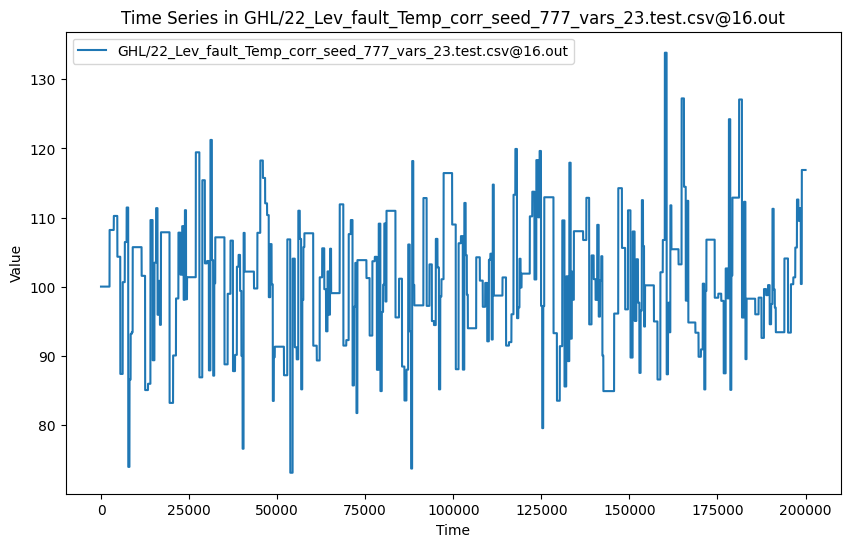

Plotting for subfolder: KDD21
Filename: 019_UCR_Anomaly_DISTORTEDGP711MarkerLFM5z1_5000_6168_6212.out


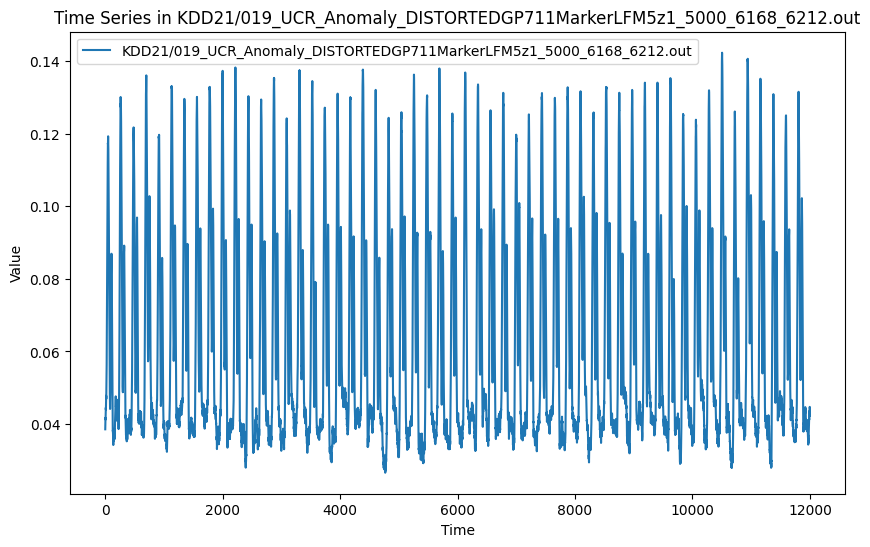

Filename: 225_UCR_Anomaly_mit14046longtermecg_81214_143000_143300.out


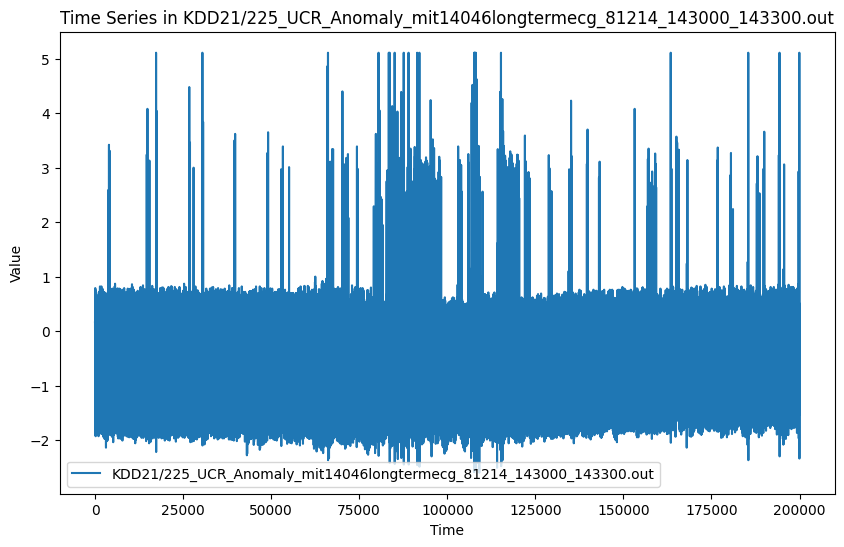

Filename: 139_UCR_Anomaly_InternalBleeding20_2700_5759_5919.out


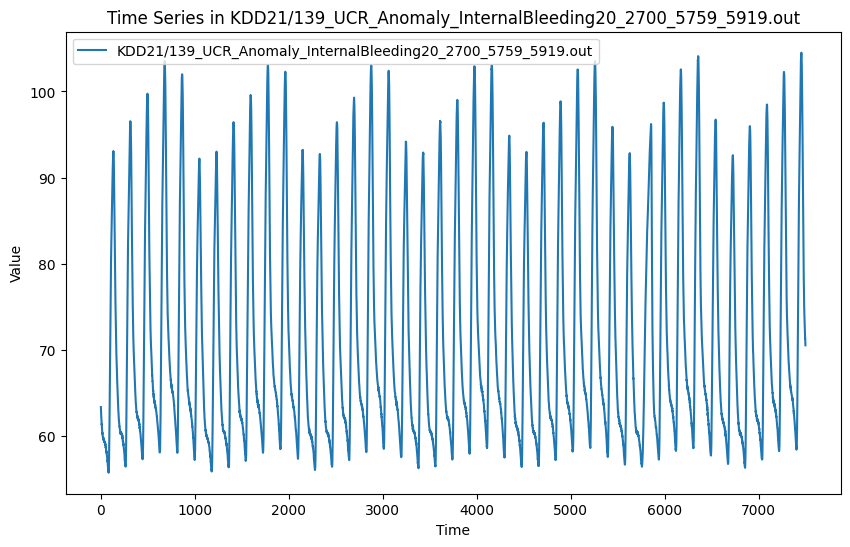

Filename: 149_UCR_Anomaly_Lab2Cmac011215EPG5_7000_17390_17520.out


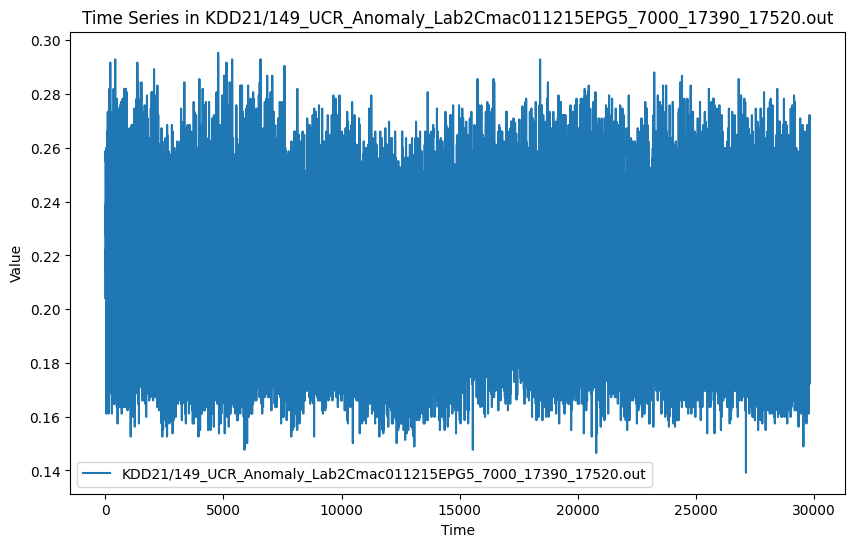

Plotting for subfolder: SMD
Filename: machine-2-3.test.csv@1.out


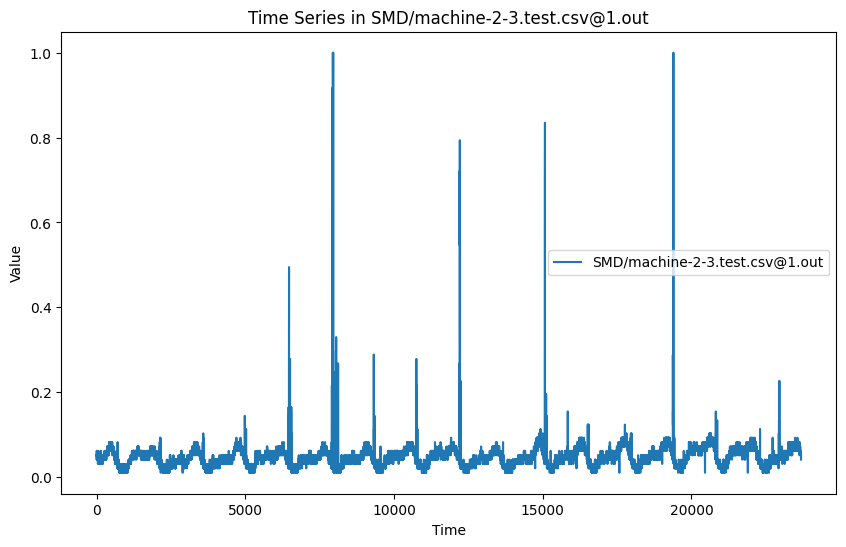

Filename: machine-3-9.test.csv@20.out


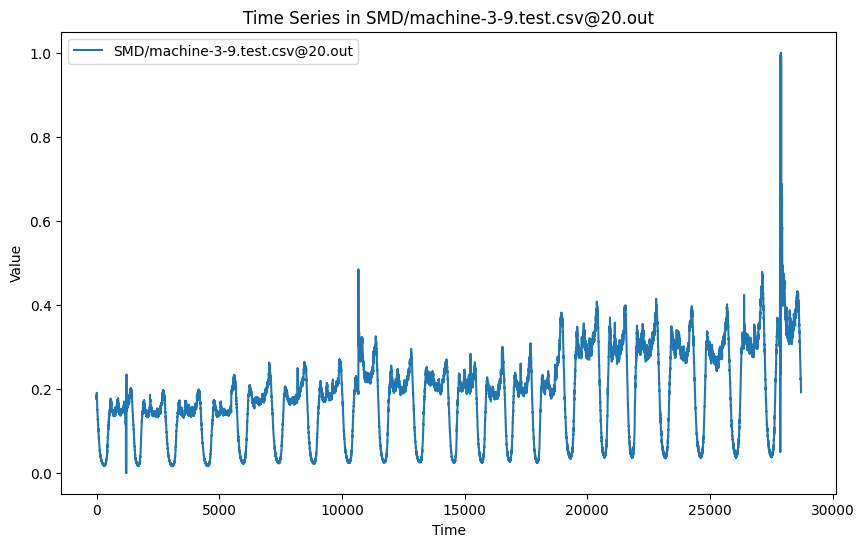

Filename: machine-3-10.test.csv@23.out


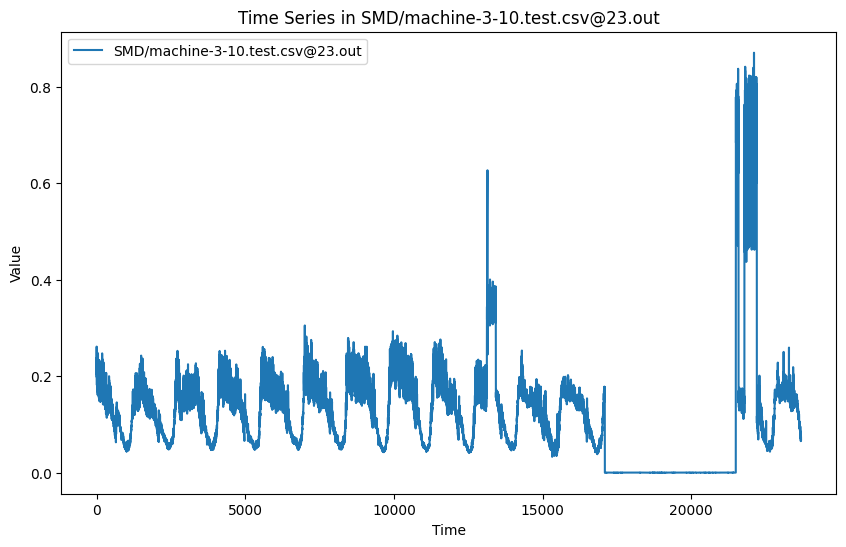

Filename: machine-3-10.test.csv@21.out


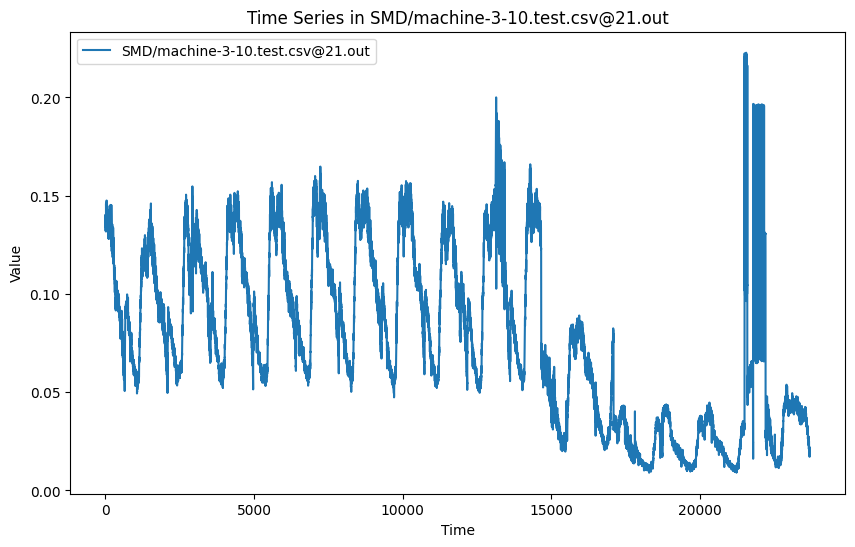

Plotting for subfolder: YAHOO
Filename: Yahoo_A2synthetic_82_data.out


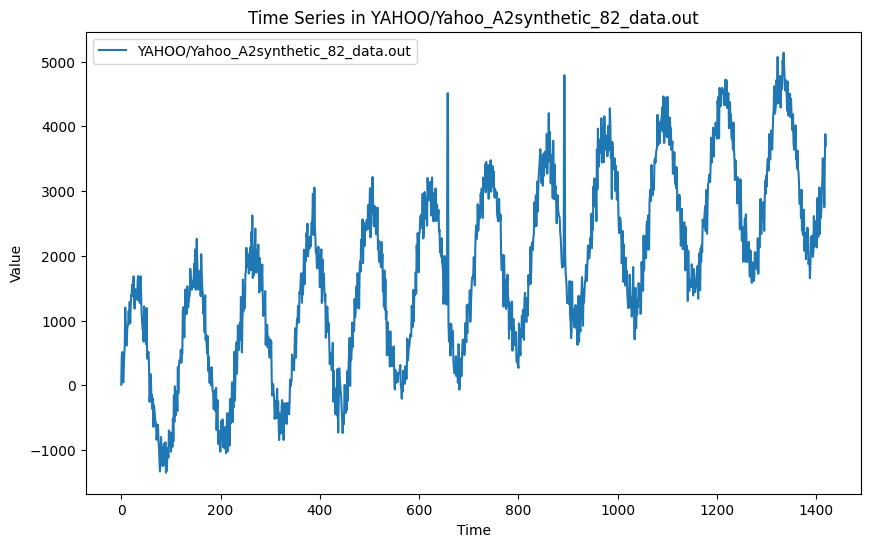

Filename: YahooA4Benchmark-TS90_data.out


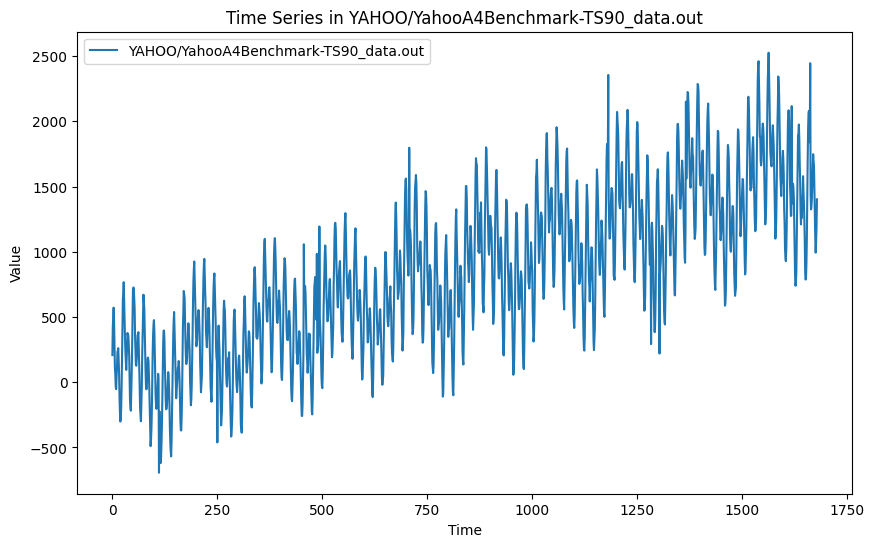

Filename: Yahoo_A2synthetic_68_data.out


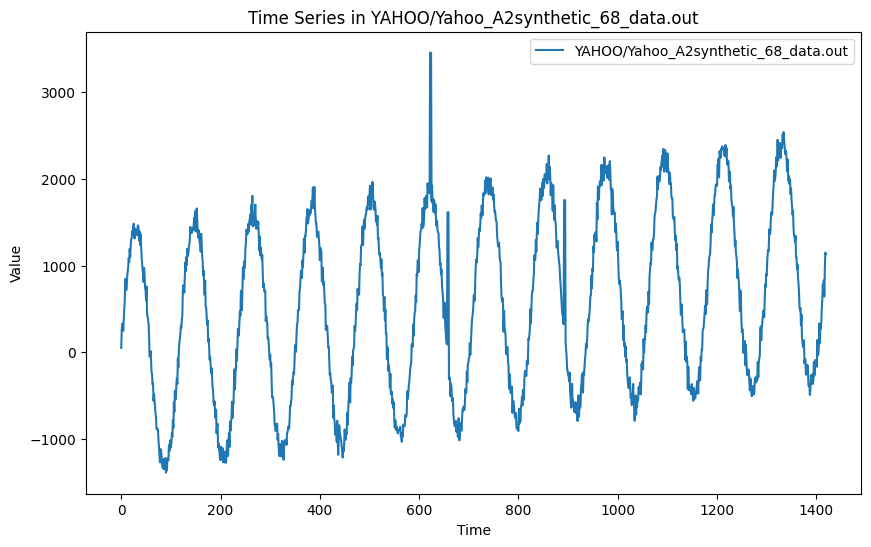

Filename: Yahoo_A1real_53_data.out


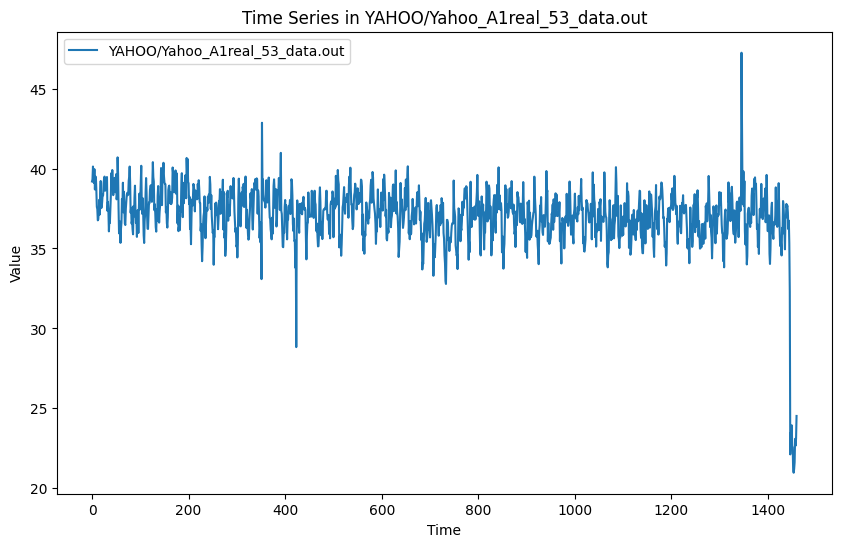

Plotting for subfolder: OPPORTUNITY
Filename: S3-ADL4.test.csv@132.out


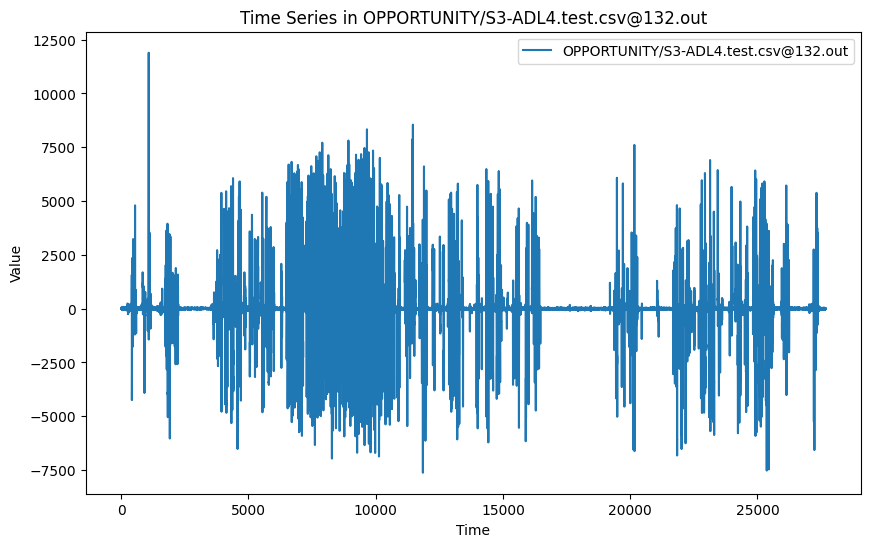

Filename: S2-ADL4.test.csv@93.out


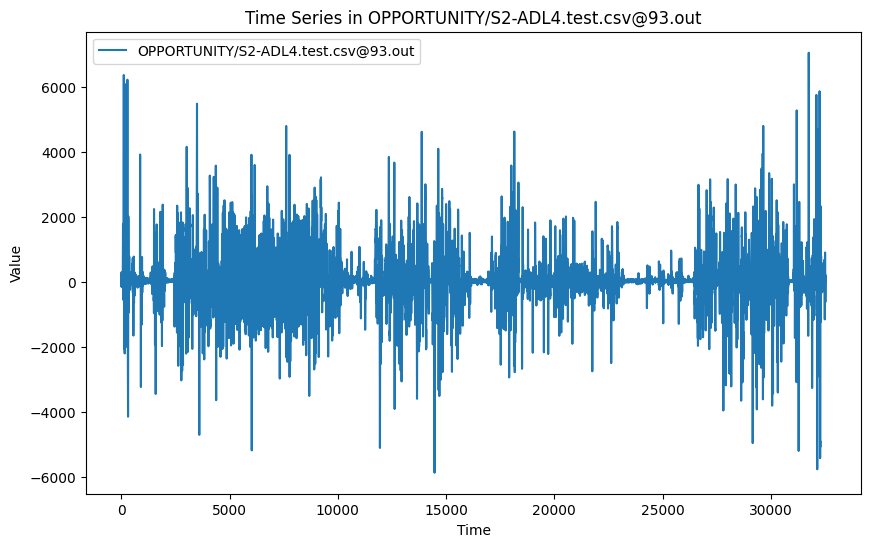

Filename: S4-ADL5.test.csv@131.out


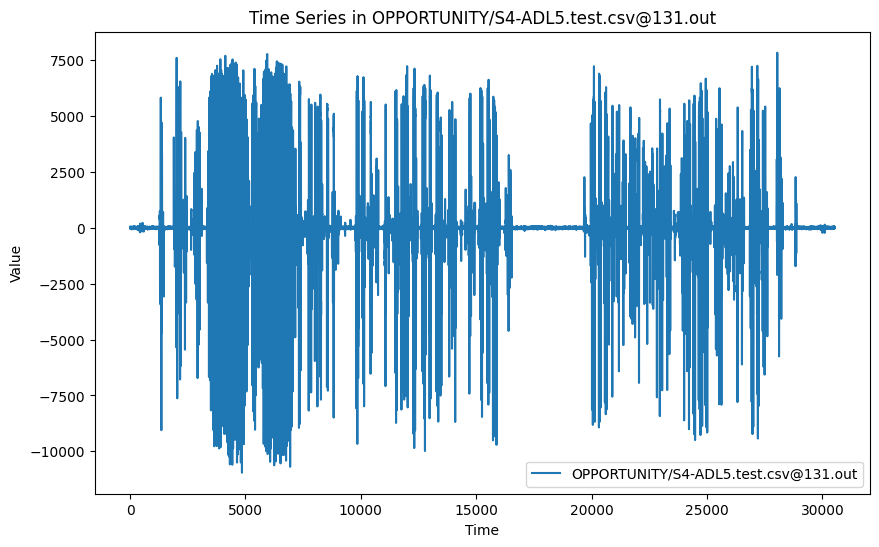

Filename: S4-ADL2.test.csv@31.out


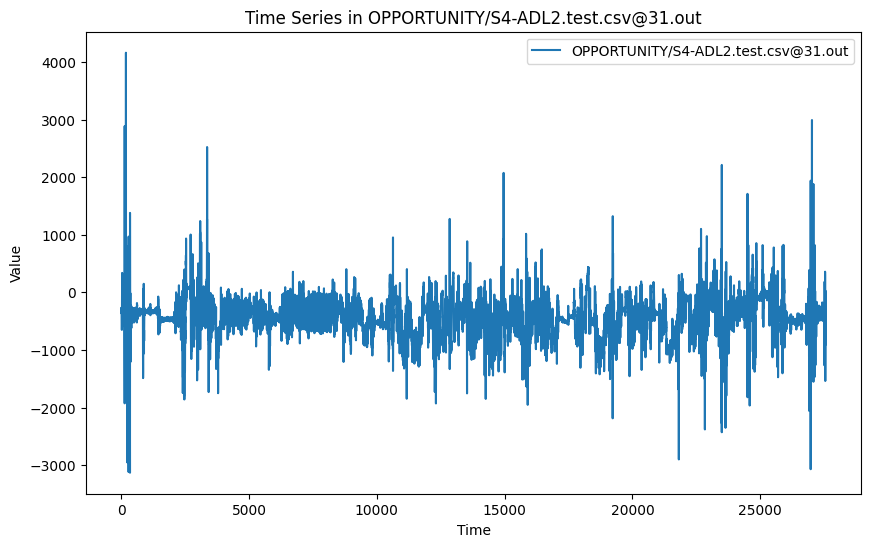

In [15]:
n = 4

# Plot the first n time series files from each sorted subfolder
for subfolder, files in sorted_subfolders:
    print(f"Plotting for subfolder: {subfolder}")
    for file in files[:n]:
        print(f"Filename: {file}")
        file_path = os.path.join(tsb_uad_pub_folder_path, subfolder, file)
        if os.path.isfile(file_path):
            df = pd.read_csv(file_path)
            plt.figure(figsize=(10, 6))
            plt.plot(df.index, df.iloc[:, 0], label=f'{subfolder}/{file}')
            plt.title(f'Time Series in {subfolder}/{file}')
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.legend()
            plt.show()

## Randomly pick files from subfolders